In [60]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import numpy as np
import scipy.stats as stats

In [ ]:
# Define base paths
data_dir = "../../data/loaded"
Images_dir = "../../images/EDA_1"
climate_file_path = os.path.join(data_dir, "climate.csv")

In [ ]:
climate_df = pd.read_csv(climate_file_path)

## General inspection

In [4]:
climate_df.head()

time        lat       lon    prec  tmin   tmax
0     1  37.291667  9.541667  48.075  8.50  16.50
1     1  37.291667  9.625000  45.525  8.25  16.75
2     1  37.291667  9.708333  42.900  8.25  16.75
3     1  37.291667  9.791667  40.975  8.25  17.00
4     1  37.208333  9.208333  54.350  9.00  17.00

In [5]:
print("shape:", climate_df.shape)
print("columns:", climate_df.columns)
print("missing values:\n", climate_df.isnull().sum())

shape: (395124, 6)
columns: Index(['time', 'lat', 'lon', 'prec', 'tmin', 'tmax'], dtype='object')
missing values:
 time    0
lat     0
lon     0
prec    0
tmin    0
tmax    0
dtype: int64


In [6]:
climate_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395124 entries, 0 to 395123
Data columns (total 6 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   time    395124 non-null  int64  
 1   lat     395124 non-null  float64
 2   lon     395124 non-null  float64
 3   prec    395124 non-null  float64
 4   tmin    395124 non-null  float64
 5   tmax    395124 non-null  float64
dtypes: float64(5), int64(1)
memory usage: 18.1 MB


In [7]:
climate_df.describe()

time            lat            lon           prec  \
count  395124.000000  395124.000000  395124.000000  395124.000000   
mean        6.500000      28.565849       3.108228       5.298888   
std         3.452057       4.405626       4.543884      11.136617   
min         1.000000      19.041667      -8.625000       0.000000   
25%         3.750000      25.125000      -0.125000       0.800000   
50%         6.500000      28.375000       3.458333       1.725000   
75%         9.250000      32.125000       6.791667       4.475000   
max        12.000000      37.291667      11.958333     266.150000   

                tmin           tmax  
count  395124.000000  395124.000000  
mean       16.838228      31.358228  
std         8.055408       8.543038  
min        -2.250000       5.250000  
25%        10.000000      24.250000  
50%        17.000000      32.000000  
75%        24.000000      38.250000  
max        32.000000      48.000000

In [9]:
print("number of unique values per lon/lat/time combination:")
print(climate_df.groupby(['lon', 'lat', 'time']).ngroups)

number of unique values per lon/lat/time combination:
395124


In [11]:
# number of values in each time point
time_counts = climate_df['time'].value_counts().sort_index()
print(time_counts)

time
1     32927
2     32927
3     32927
4     32927
5     32927
6     32927
7     32927
8     32927
9     32927
10    32927
11    32927
12    32927
Name: count, dtype: int64


## Univariate Analysis

### Prec

In [16]:
# plot distributions of prec for each time (month) point in subplots
unique_times = climate_df['time'].unique()
num_times = len(unique_times)

fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(12, 10), sharex=True)

for i, time in enumerate(unique_times):
    sns.boxplot(x='prec', data=climate_df[climate_df['time'] == time], ax=axes[i // 3, i % 3], color='skyblue')
    axes[i // 3, i % 3].set_title(f'Distribution of Precipitation at month {time}')
    axes[i // 3, i % 3].set_xlabel('Precipitation (prec)')

plt.tight_layout()
plt.savefig(os.path.join(Images_dir, "precipitation_month_boxplots.png"))
plt.show()

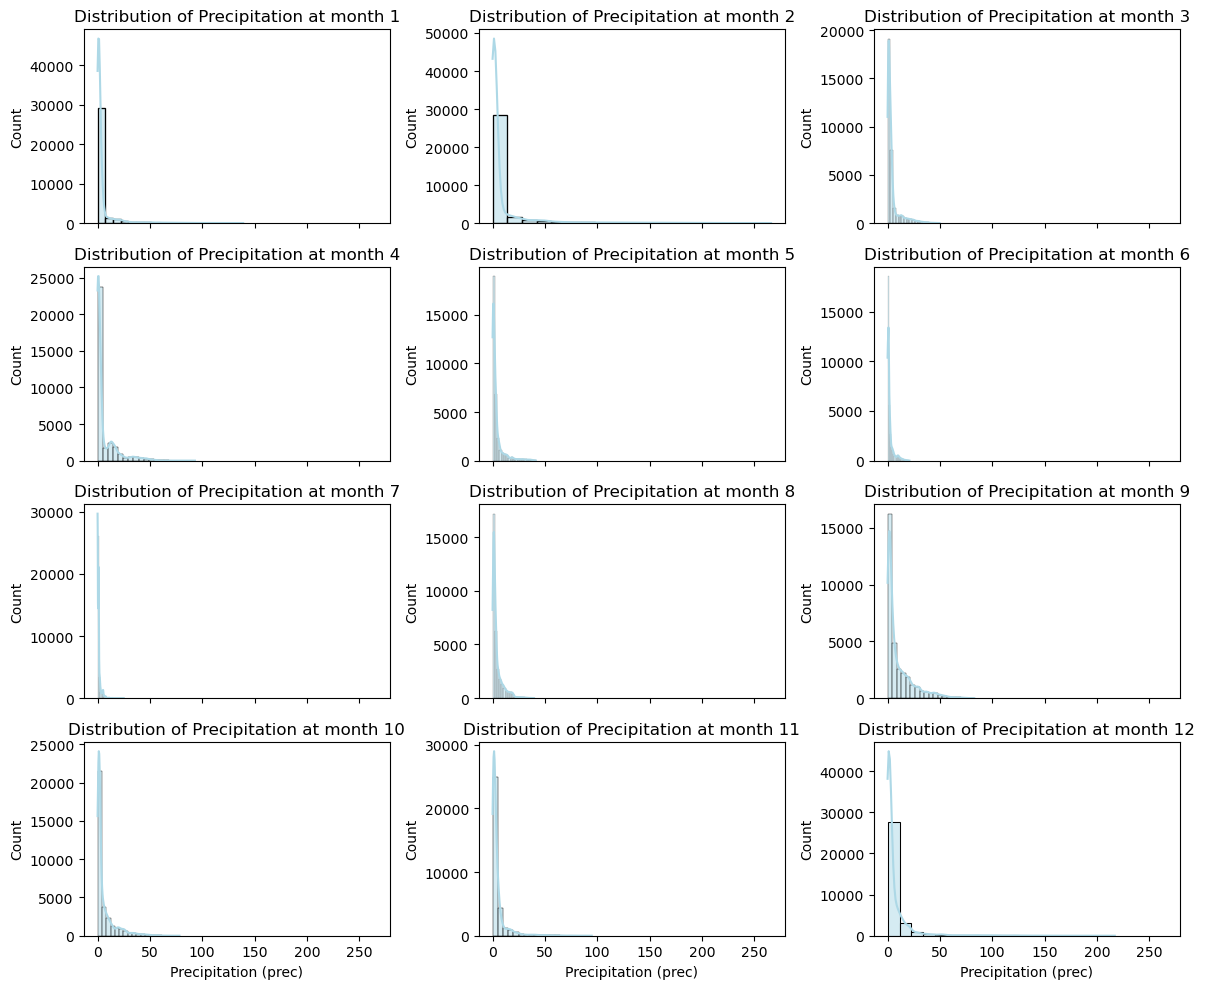

In [18]:
# plot distributions of prec for each time (month) point in subplots with histograms and kde
fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(12, 10), sharex=True)
# calculate number of bins with sturges' formula
num_bins = 1 + (10/3) * np.log10(len(climate_df['prec']))

for i, time in enumerate(unique_times):
    sns.histplot(climate_df[climate_df['time'] == time]['prec'], bins=int(num_bins), kde=True, ax=axes[i // 3, i % 3], color='lightblue')
    axes[i // 3, i % 3].set_title(f'Distribution of Precipitation at month {time}')
    axes[i // 3, i % 3].set_xlabel('Precipitation (prec)')

plt.tight_layout()
plt.savefig(os.path.join(Images_dir, "precipitation_month_histograms.png"))
plt.show()

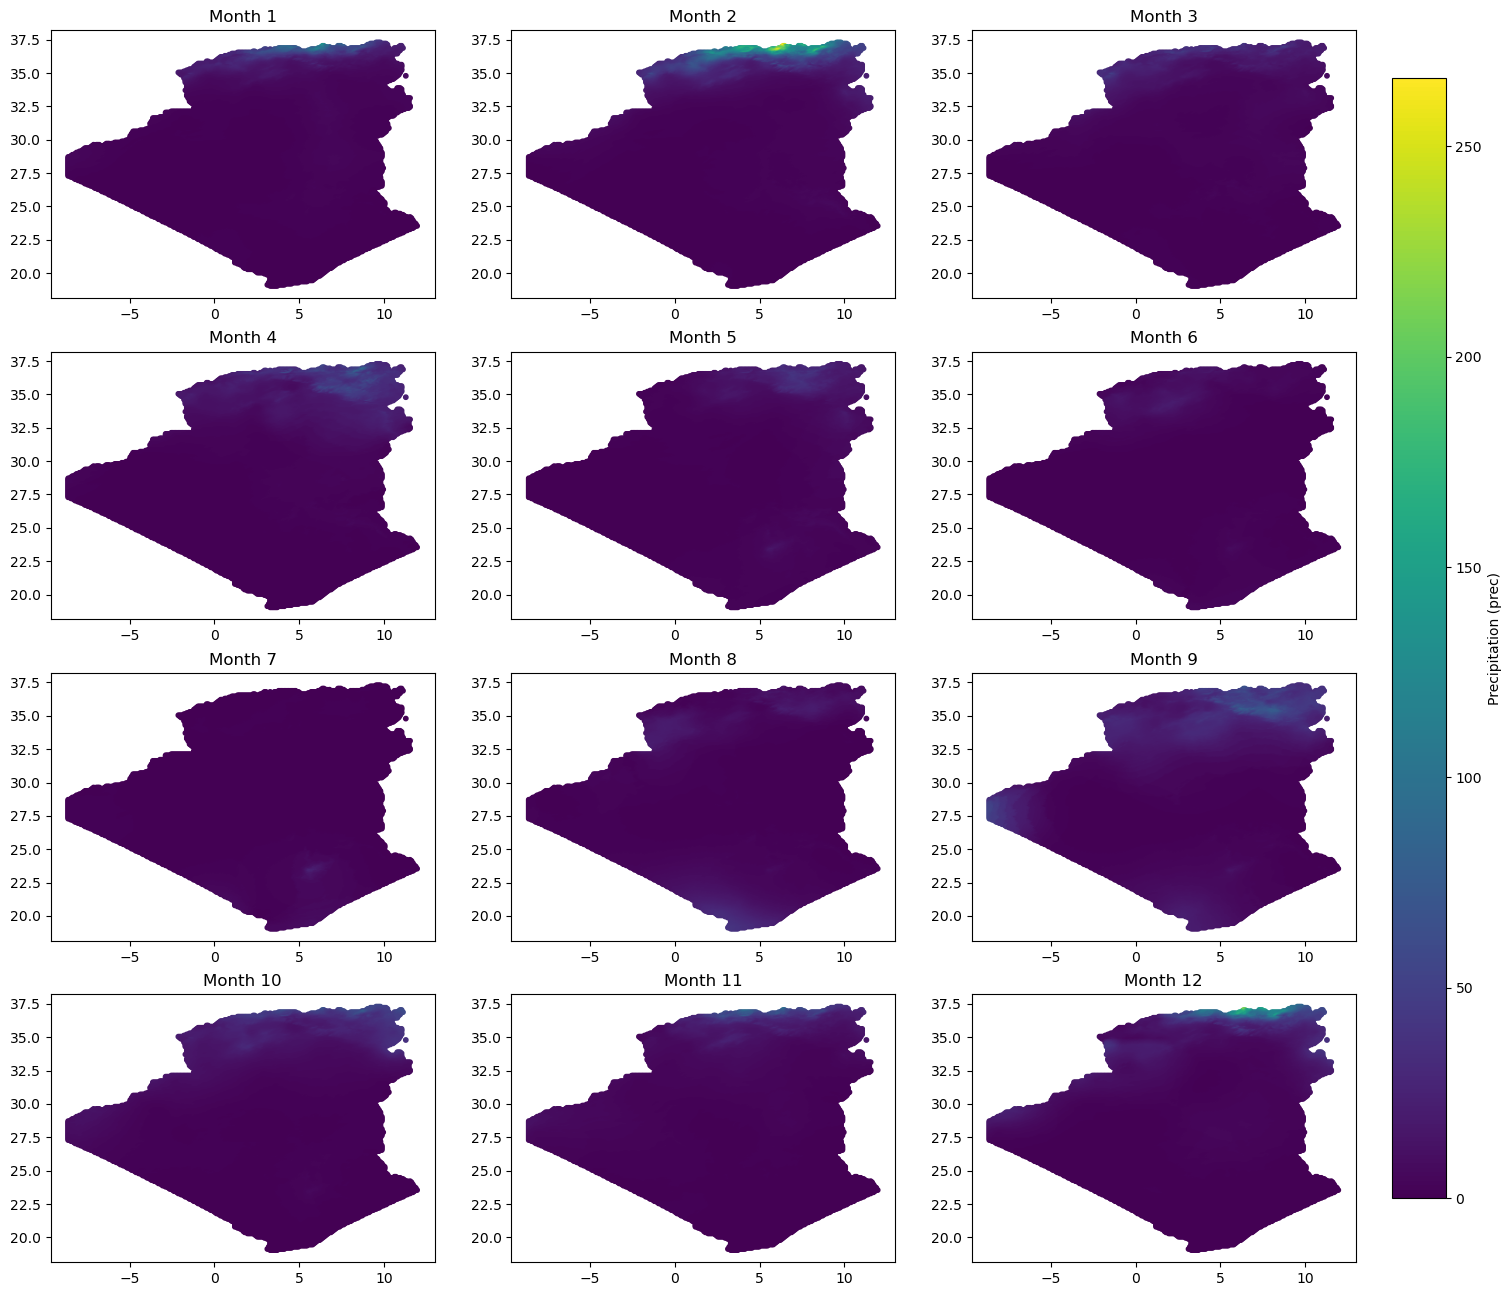

In [22]:
# --- Plot maps with single colorbar on the right ---
fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(18, 16))  
vmin = climate_df['prec'].min()
vmax = climate_df['prec'].max()

for i, time in enumerate(unique_times):
    ax = axes[i // 3, i % 3]
    sc = ax.scatter(
        climate_df[climate_df['time'] == time]['lon'],
        climate_df[climate_df['time'] == time]['lat'],
        c=climate_df[climate_df['time'] == time]['prec'],
        cmap='viridis',
        vmin=vmin,
        vmax=vmax,
        s=10
    )
    ax.set_title(f'Month {time}')

# Leave space on the right for the colorbar
fig.subplots_adjust(right=0.85)  # reserve 15% of figure for colorbar

# Place colorbar in the reserved space
cbar_ax = fig.add_axes([0.87, 0.15, 0.03, 0.7])  # [left, bottom, width, height]
fig.colorbar(sc, cax=cbar_ax, label='Precipitation (prec)')

plt.savefig(os.path.join(Images_dir, "precipitation_month_maps.png"))
plt.show()


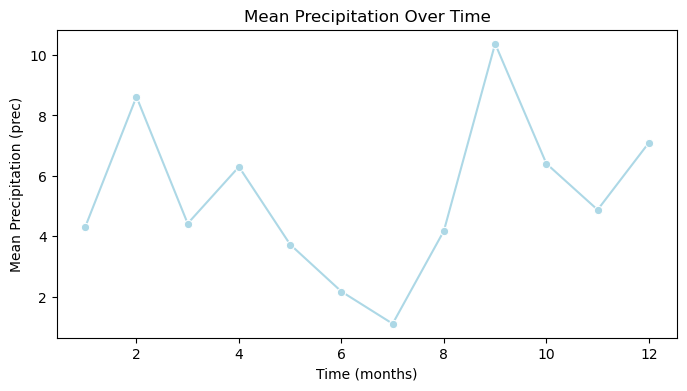

In [25]:
# plot mean prec over time
mean_prec_over_time = climate_df.groupby('time')['prec'].mean().reset_index()
plt.figure(figsize=(8, 4))
sns.lineplot(x='time', y='prec', data=mean_prec_over_time, marker='o', color='lightblue')
plt.title('Mean Precipitation Over Time')
plt.xlabel('Time (months)')
plt.ylabel('Mean Precipitation (prec)')
plt.savefig(os.path.join(Images_dir, "mean_precipitation_over_time.png"))
plt.show()

In [52]:
# 5 numbers summary for prec
print("Precipitation (prec) statistics:")
climate_df['prec'].describe()

Precipitation (prec) statistics:


count    395124.000000
mean          5.298888
std          11.136617
min           0.000000
25%           0.800000
50%           1.725000
75%           4.475000
max         266.150000
Name: prec, dtype: float64

In [28]:
print("number of unique prec values:", climate_df['prec'].nunique())

number of unique prec values: 5530


In [42]:
# outliers of each month in prec
# print number, percentage, number high, number low in one line for each month
for time in unique_times:
    month_outliers = climate_df[climate_df['time'] == time]
    Q1 = month_outliers['prec'].quantile(0.25)
    Q3 = month_outliers['prec'].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = month_outliers[(month_outliers['prec'] < lower_bound) | (month_outliers['prec'] > upper_bound)]
    print(f"Month {time}: Number of outliers in 'prec': {len(outliers)}, Percentage: {len(outliers) / len(month_outliers) * 100:.2f}%, High outliers: {len(month_outliers[month_outliers['prec'] > upper_bound])}, Low outliers: {len(month_outliers[month_outliers['prec'] < lower_bound])}")


Month 1: Number of outliers in 'prec': 3908, Percentage: 11.87%, High outliers: 3908, Low outliers: 0
Month 2: Number of outliers in 'prec': 5501, Percentage: 16.71%, High outliers: 5501, Low outliers: 0
Month 3: Number of outliers in 'prec': 4412, Percentage: 13.40%, High outliers: 4412, Low outliers: 0
Month 4: Number of outliers in 'prec': 3656, Percentage: 11.10%, High outliers: 3656, Low outliers: 0
Month 5: Number of outliers in 'prec': 3942, Percentage: 11.97%, High outliers: 3942, Low outliers: 0
Month 6: Number of outliers in 'prec': 3667, Percentage: 11.14%, High outliers: 3667, Low outliers: 0
Month 7: Number of outliers in 'prec': 3012, Percentage: 9.15%, High outliers: 3012, Low outliers: 0
Month 8: Number of outliers in 'prec': 3334, Percentage: 10.13%, High outliers: 3334, Low outliers: 0
Month 9: Number of outliers in 'prec': 2321, Percentage: 7.05%, High outliers: 2321, Low outliers: 0
Month 10: Number of outliers in 'prec': 3939, Percentage: 11.96%, High outliers: 393

### Tmin

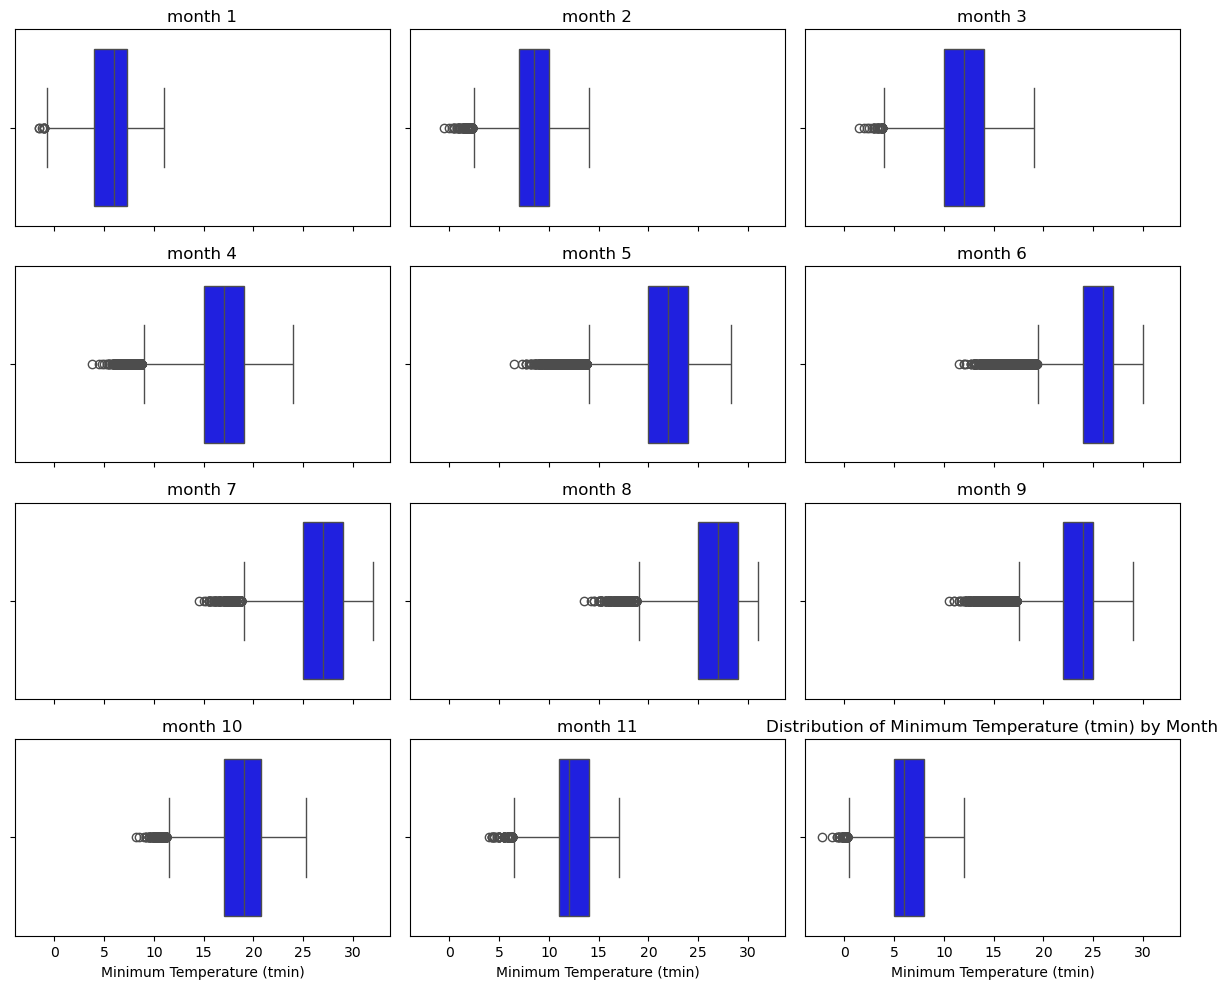

In [31]:
fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(12, 10), sharex=True)

for i, time in enumerate(unique_times):
    sns.boxplot(x='tmin', data=climate_df[climate_df['time'] == time], ax=axes[i // 3, i % 3], color='blue')
    axes[i // 3, i % 3].set_title(f'month {time}')
    axes[i // 3, i % 3].set_xlabel('Minimum Temperature (tmin)')
plt.title('Distribution of Minimum Temperature (tmin) by Month')
plt.tight_layout()
plt.savefig(os.path.join(Images_dir, "tmin_month_boxplots.png"))
plt.show()

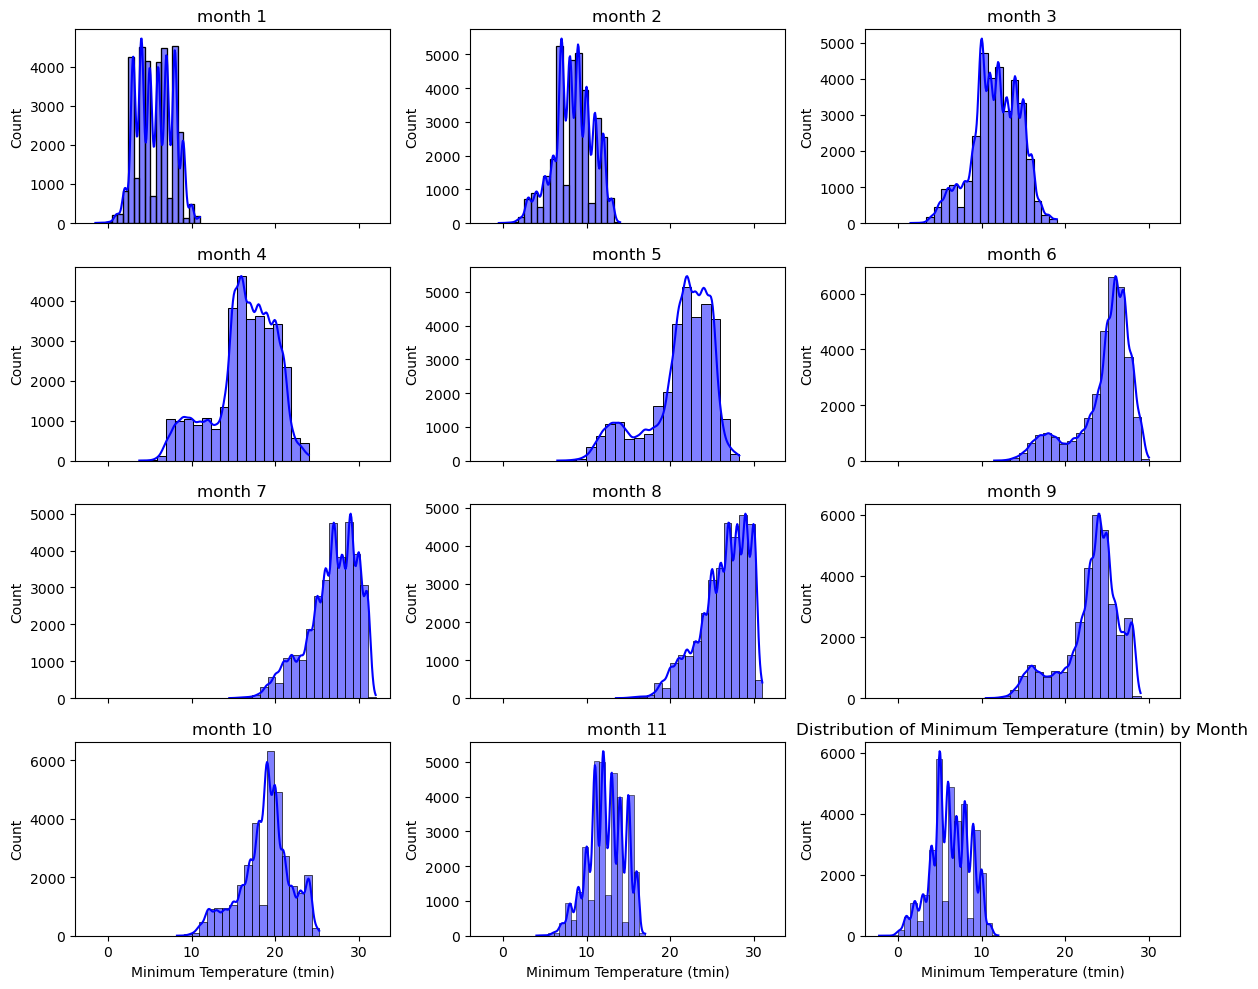

In [33]:
fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(12, 10), sharex=True)
num_bins = 1 + (10/3) * np.log10(len(climate_df['tmin']))

for i, time in enumerate(unique_times):
    sns.histplot(climate_df[climate_df['time'] == time]['tmin'], bins=int(num_bins), kde=True, ax=axes[i // 3, i % 3], color='blue')
    axes[i // 3, i % 3].set_title(f'month {time}')
    axes[i // 3, i % 3].set_xlabel('Minimum Temperature (tmin)')

plt.tight_layout()
plt.title('Distribution of Minimum Temperature (tmin) by Month')
plt.savefig(os.path.join(Images_dir, "tmin_month_histograms.png"))
plt.show()

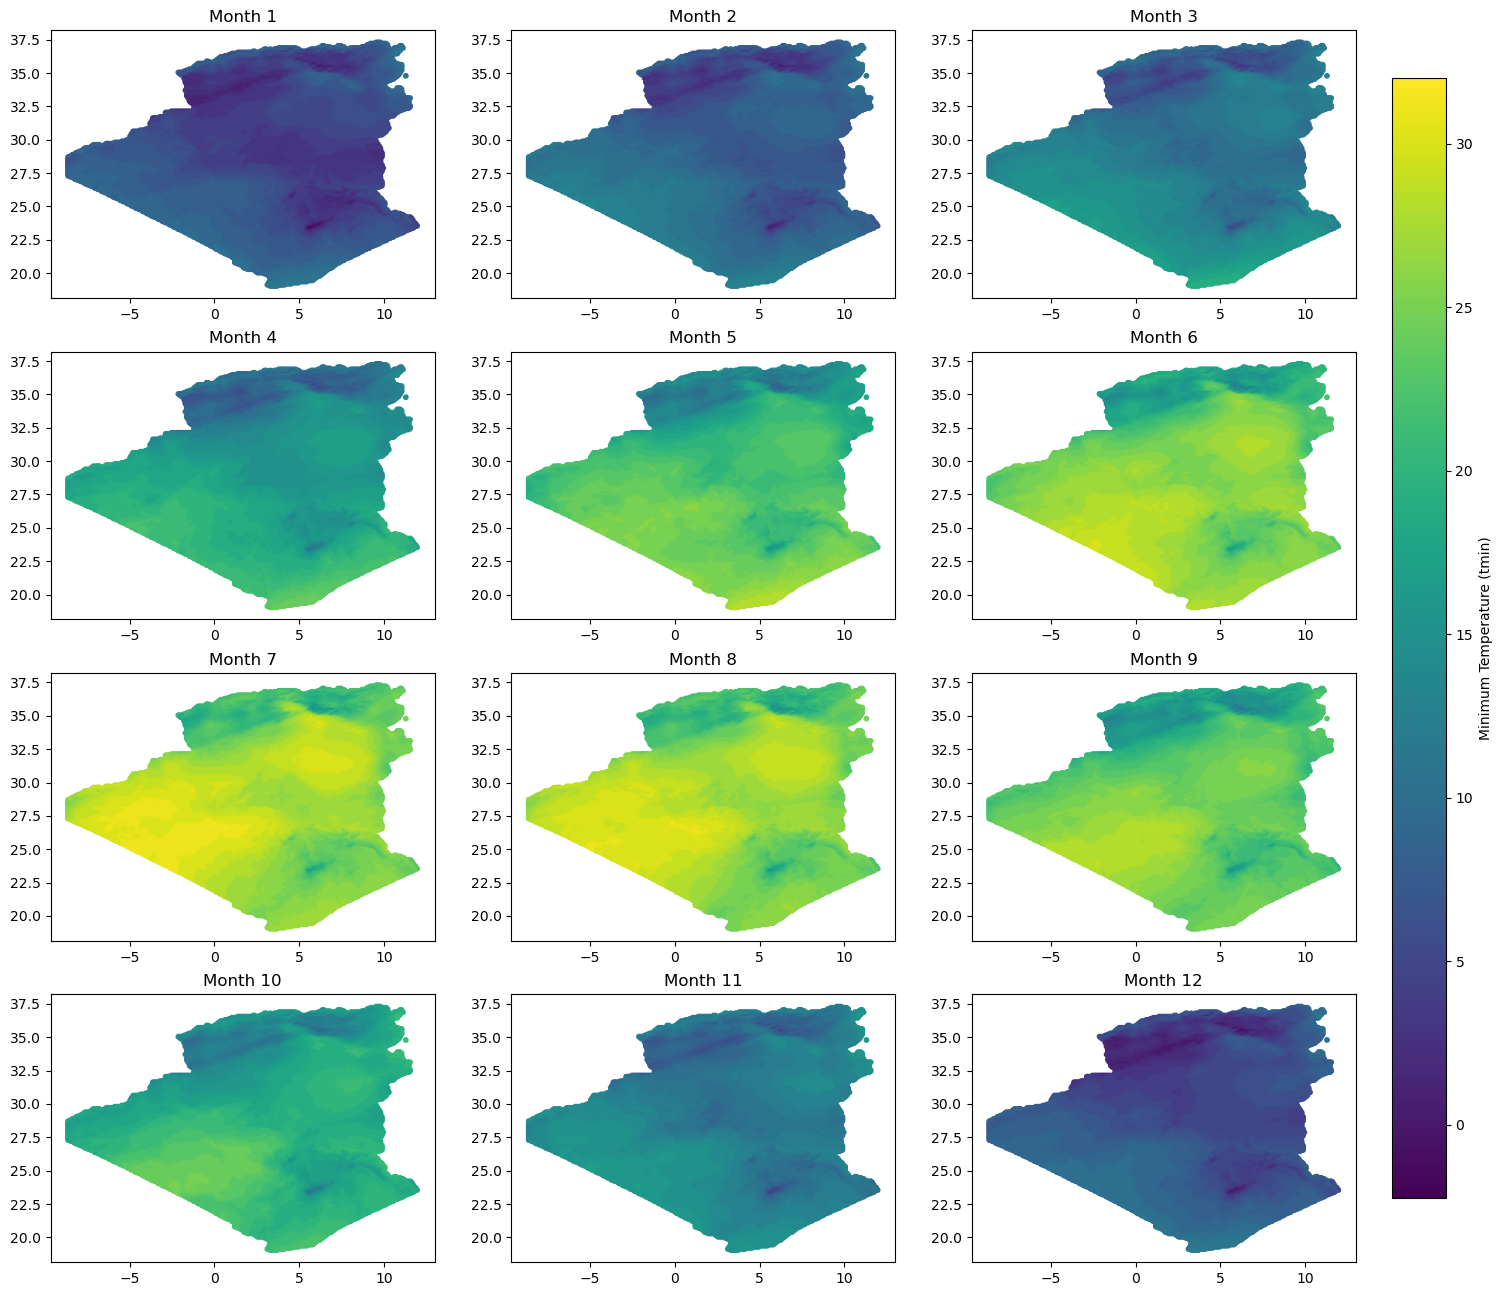

In [34]:
fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(18, 16))  
vmin = climate_df['tmin'].min()
vmax = climate_df['tmin'].max()

for i, time in enumerate(unique_times):
    ax = axes[i // 3, i % 3]
    sc = ax.scatter(
        climate_df[climate_df['time'] == time]['lon'],
        climate_df[climate_df['time'] == time]['lat'],
        c=climate_df[climate_df['time'] == time]['tmin'],
        cmap='viridis',
        vmin=vmin,
        vmax=vmax,
        s=10
    )
    ax.set_title(f'Month {time}')

# Leave space on the right for the colorbar
fig.subplots_adjust(right=0.85)  # reserve 15% of figure for colorbar


cbar_ax = fig.add_axes([0.87, 0.15, 0.03, 0.7]) 
fig.colorbar(sc, cax=cbar_ax, label='Minimum Temperature (tmin)')

plt.savefig(os.path.join(Images_dir, "tmin_month_maps.png"))
plt.show()


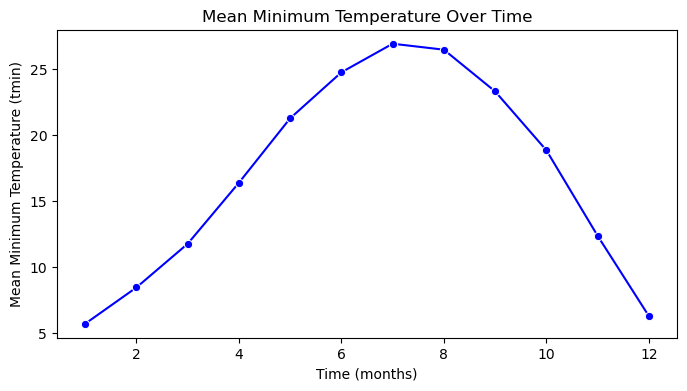

In [36]:
mean_tmin_over_time = climate_df.groupby('time')['tmin'].mean().reset_index()
plt.figure(figsize=(8, 4))
sns.lineplot(x='time', y='tmin', data=mean_tmin_over_time, marker='o', color='blue')
plt.title('Mean Minimum Temperature Over Time')
plt.xlabel('Time (months)')
plt.ylabel('Mean Minimum Temperature (tmin)')
plt.savefig(os.path.join(Images_dir, "mean_tmin_over_time.png"))
plt.show()

In [51]:
print("tmin statistics:")
climate_df['tmin'].describe()

tmin statistics:


count    395124.000000
mean         16.838228
std           8.055408
min          -2.250000
25%          10.000000
50%          17.000000
75%          24.000000
max          32.000000
Name: tmin, dtype: float64

In [38]:
print("unique tmin values:", climate_df['tmin'].nunique())

unique tmin values: 171


In [41]:
# outliers of each month in tmin
for time in unique_times:
    month_outliers = climate_df[climate_df['time'] == time]
    Q1 = month_outliers['tmin'].quantile(0.25)
    Q3 = month_outliers['tmin'].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = month_outliers[(month_outliers['tmin'] < lower_bound) | (month_outliers['tmin'] > upper_bound)]
    print(f"Month {time}: Number of outliers in 'tmin': {len(outliers)}, Percentage: {len(outliers) / len(month_outliers) * 100:.2f}%, High outliers: {len(month_outliers[month_outliers['tmin'] > upper_bound])}, Low outliers: {len(month_outliers[month_outliers['tmin'] < lower_bound])}")


Month 1: Number of outliers in 'tmin': 8, Percentage: 0.02%, High outliers: 0, Low outliers: 8
Month 2: Number of outliers in 'tmin': 168, Percentage: 0.51%, High outliers: 0, Low outliers: 168
Month 3: Number of outliers in 'tmin': 41, Percentage: 0.12%, High outliers: 0, Low outliers: 41
Month 4: Number of outliers in 'tmin': 1617, Percentage: 4.91%, High outliers: 0, Low outliers: 1617
Month 5: Number of outliers in 'tmin': 2607, Percentage: 7.92%, High outliers: 0, Low outliers: 2607
Month 6: Number of outliers in 'tmin': 3791, Percentage: 11.51%, High outliers: 0, Low outliers: 3791
Month 7: Number of outliers in 'tmin': 244, Percentage: 0.74%, High outliers: 0, Low outliers: 244
Month 8: Number of outliers in 'tmin': 321, Percentage: 0.97%, High outliers: 0, Low outliers: 321
Month 9: Number of outliers in 'tmin': 3014, Percentage: 9.15%, High outliers: 0, Low outliers: 3014
Month 10: Number of outliers in 'tmin': 416, Percentage: 1.26%, High outliers: 0, Low outliers: 416
Month 

### tmax

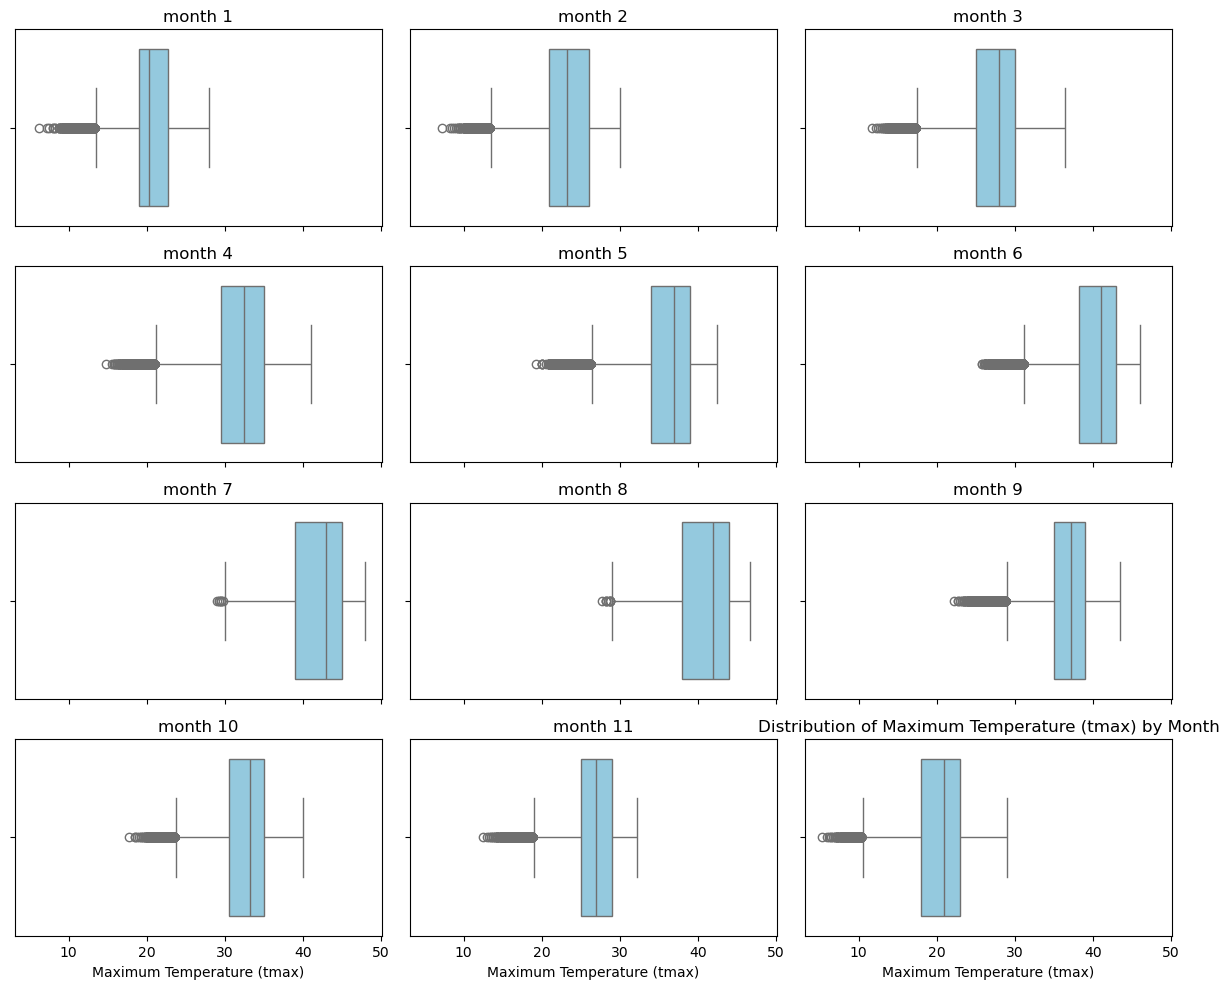

In [43]:
fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(12, 10), sharex=True)

for i, time in enumerate(unique_times):
    sns.boxplot(x='tmax', data=climate_df[climate_df['time'] == time], ax=axes[i // 3, i % 3], color='skyblue')
    axes[i // 3, i % 3].set_title(f'month {time}')
    axes[i // 3, i % 3].set_xlabel('Maximum Temperature (tmax)')
plt.title('Distribution of Maximum Temperature (tmax) by Month')
plt.tight_layout()
plt.savefig(os.path.join(Images_dir, "tmax_month_boxplots.png"))
plt.show()

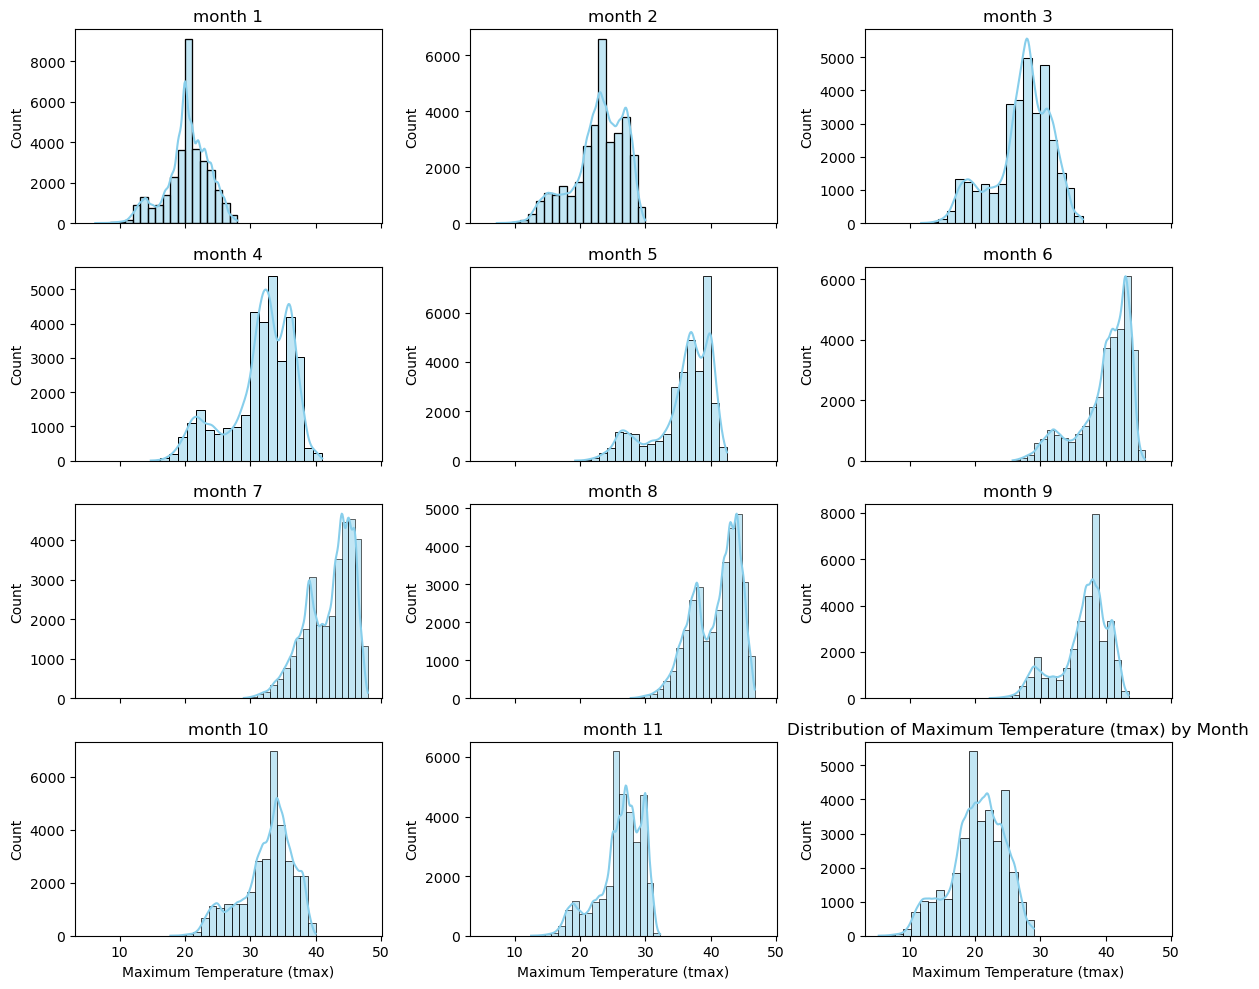

In [44]:
fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(12, 10), sharex=True)
num_bins = 1 + (10/3) * np.log10(len(climate_df['tmax']))

for i, time in enumerate(unique_times):
    sns.histplot(climate_df[climate_df['time'] == time]['tmax'], bins=int(num_bins), kde=True, ax=axes[i // 3, i % 3], color='skyblue')
    axes[i // 3, i % 3].set_title(f'month {time}')
    axes[i // 3, i % 3].set_xlabel('Maximum Temperature (tmax)')

plt.tight_layout()
plt.title('Distribution of Maximum Temperature (tmax) by Month')
plt.savefig(os.path.join(Images_dir, "tmax_month_histograms.png"))
plt.show()

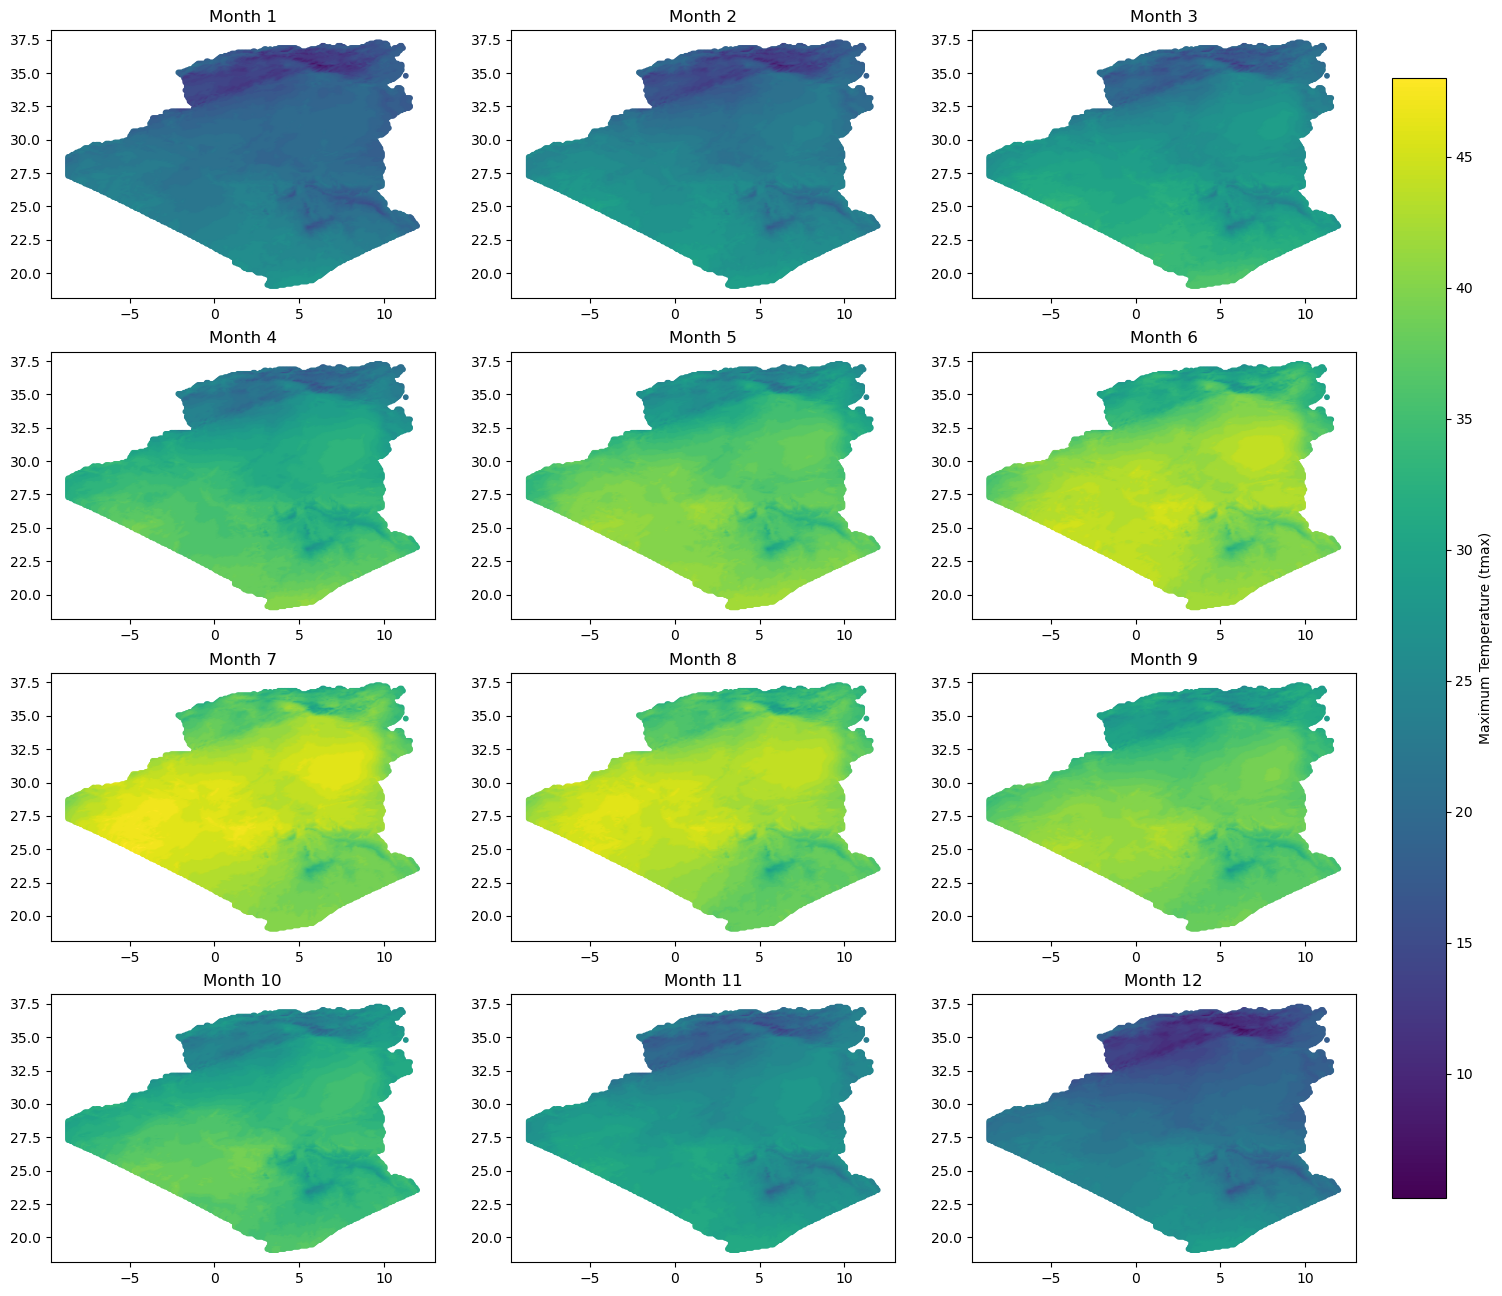

In [45]:
fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(18, 16))  
vmin = climate_df['tmax'].min()
vmax = climate_df['tmax'].max()

for i, time in enumerate(unique_times):
    ax = axes[i // 3, i % 3]
    sc = ax.scatter(
        climate_df[climate_df['time'] == time]['lon'],
        climate_df[climate_df['time'] == time]['lat'],
        c=climate_df[climate_df['time'] == time]['tmax'],
        cmap='viridis',
        vmin=vmin,
        vmax=vmax,
        s=10
    )
    ax.set_title(f'Month {time}')

# Leave space on the right for the colorbar
fig.subplots_adjust(right=0.85)  # reserve 15% of figure for colorbar


cbar_ax = fig.add_axes([0.87, 0.15, 0.03, 0.7]) 
fig.colorbar(sc, cax=cbar_ax, label='Maximum Temperature (tmax)')

plt.savefig(os.path.join(Images_dir, "tmax_month_maps.png"))
plt.show()


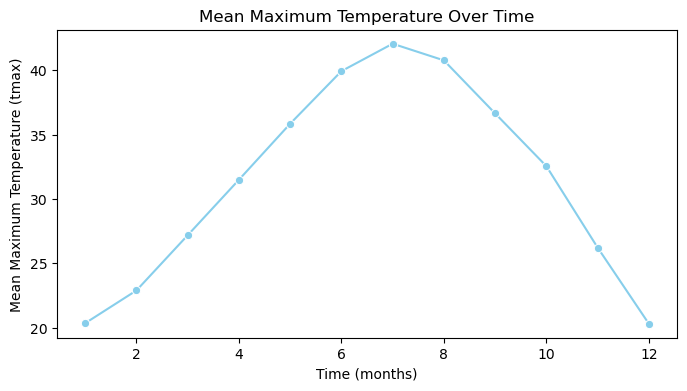

In [46]:
mean_tmax_over_time = climate_df.groupby('time')['tmax'].mean().reset_index()
plt.figure(figsize=(8, 4))
sns.lineplot(x='time', y='tmax', data=mean_tmax_over_time, marker='o', color='skyblue')
plt.title('Mean Maximum Temperature Over Time')
plt.xlabel('Time (months)')
plt.ylabel('Mean Maximum Temperature (tmax)')
plt.savefig(os.path.join(Images_dir, "mean_tmax_over_time.png"))
plt.show()

In [48]:
print("tmax statistics:")
climate_df['tmax'].describe()

tmax statistics:


count    395124.000000
mean         31.358228
std           8.543038
min           5.250000
25%          24.250000
50%          32.000000
75%          38.250000
max          48.000000
Name: tmax, dtype: float64

In [49]:
print("unique tmax values:", climate_df['tmax'].nunique())

unique tmax values: 209


In [50]:
# outliers of each month in tmax
for time in unique_times:
    month_outliers = climate_df[climate_df['time'] == time]
    Q1 = month_outliers['tmax'].quantile(0.25)
    Q3 = month_outliers['tmax'].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = month_outliers[(month_outliers['tmax'] < lower_bound) | (month_outliers['tmax'] > upper_bound)]
    print(f"Month {time}: Number of outliers in 'tmax': {len(outliers)}, Percentage: {len(outliers) / len(month_outliers) * 100:.2f}%, High outliers: {len(month_outliers[month_outliers['tmax'] > upper_bound])}, Low outliers: {len(month_outliers[month_outliers['tmax'] < lower_bound])}")


Month 1: Number of outliers in 'tmax': 1345, Percentage: 4.08%, High outliers: 0, Low outliers: 1345
Month 2: Number of outliers in 'tmax': 574, Percentage: 1.74%, High outliers: 0, Low outliers: 574
Month 3: Number of outliers in 'tmax': 916, Percentage: 2.78%, High outliers: 0, Low outliers: 916
Month 4: Number of outliers in 'tmax': 1711, Percentage: 5.20%, High outliers: 0, Low outliers: 1711
Month 5: Number of outliers in 'tmax': 1943, Percentage: 5.90%, High outliers: 0, Low outliers: 1943
Month 6: Number of outliers in 'tmax': 1612, Percentage: 4.90%, High outliers: 0, Low outliers: 1612
Month 7: Number of outliers in 'tmax': 7, Percentage: 0.02%, High outliers: 0, Low outliers: 7
Month 8: Number of outliers in 'tmax': 9, Percentage: 0.03%, High outliers: 0, Low outliers: 9
Month 9: Number of outliers in 'tmax': 1703, Percentage: 5.17%, High outliers: 0, Low outliers: 1703
Month 10: Number of outliers in 'tmax': 896, Percentage: 2.72%, High outliers: 0, Low outliers: 896
Month 1

## Bivariate Analysis

### tmin vs tmax

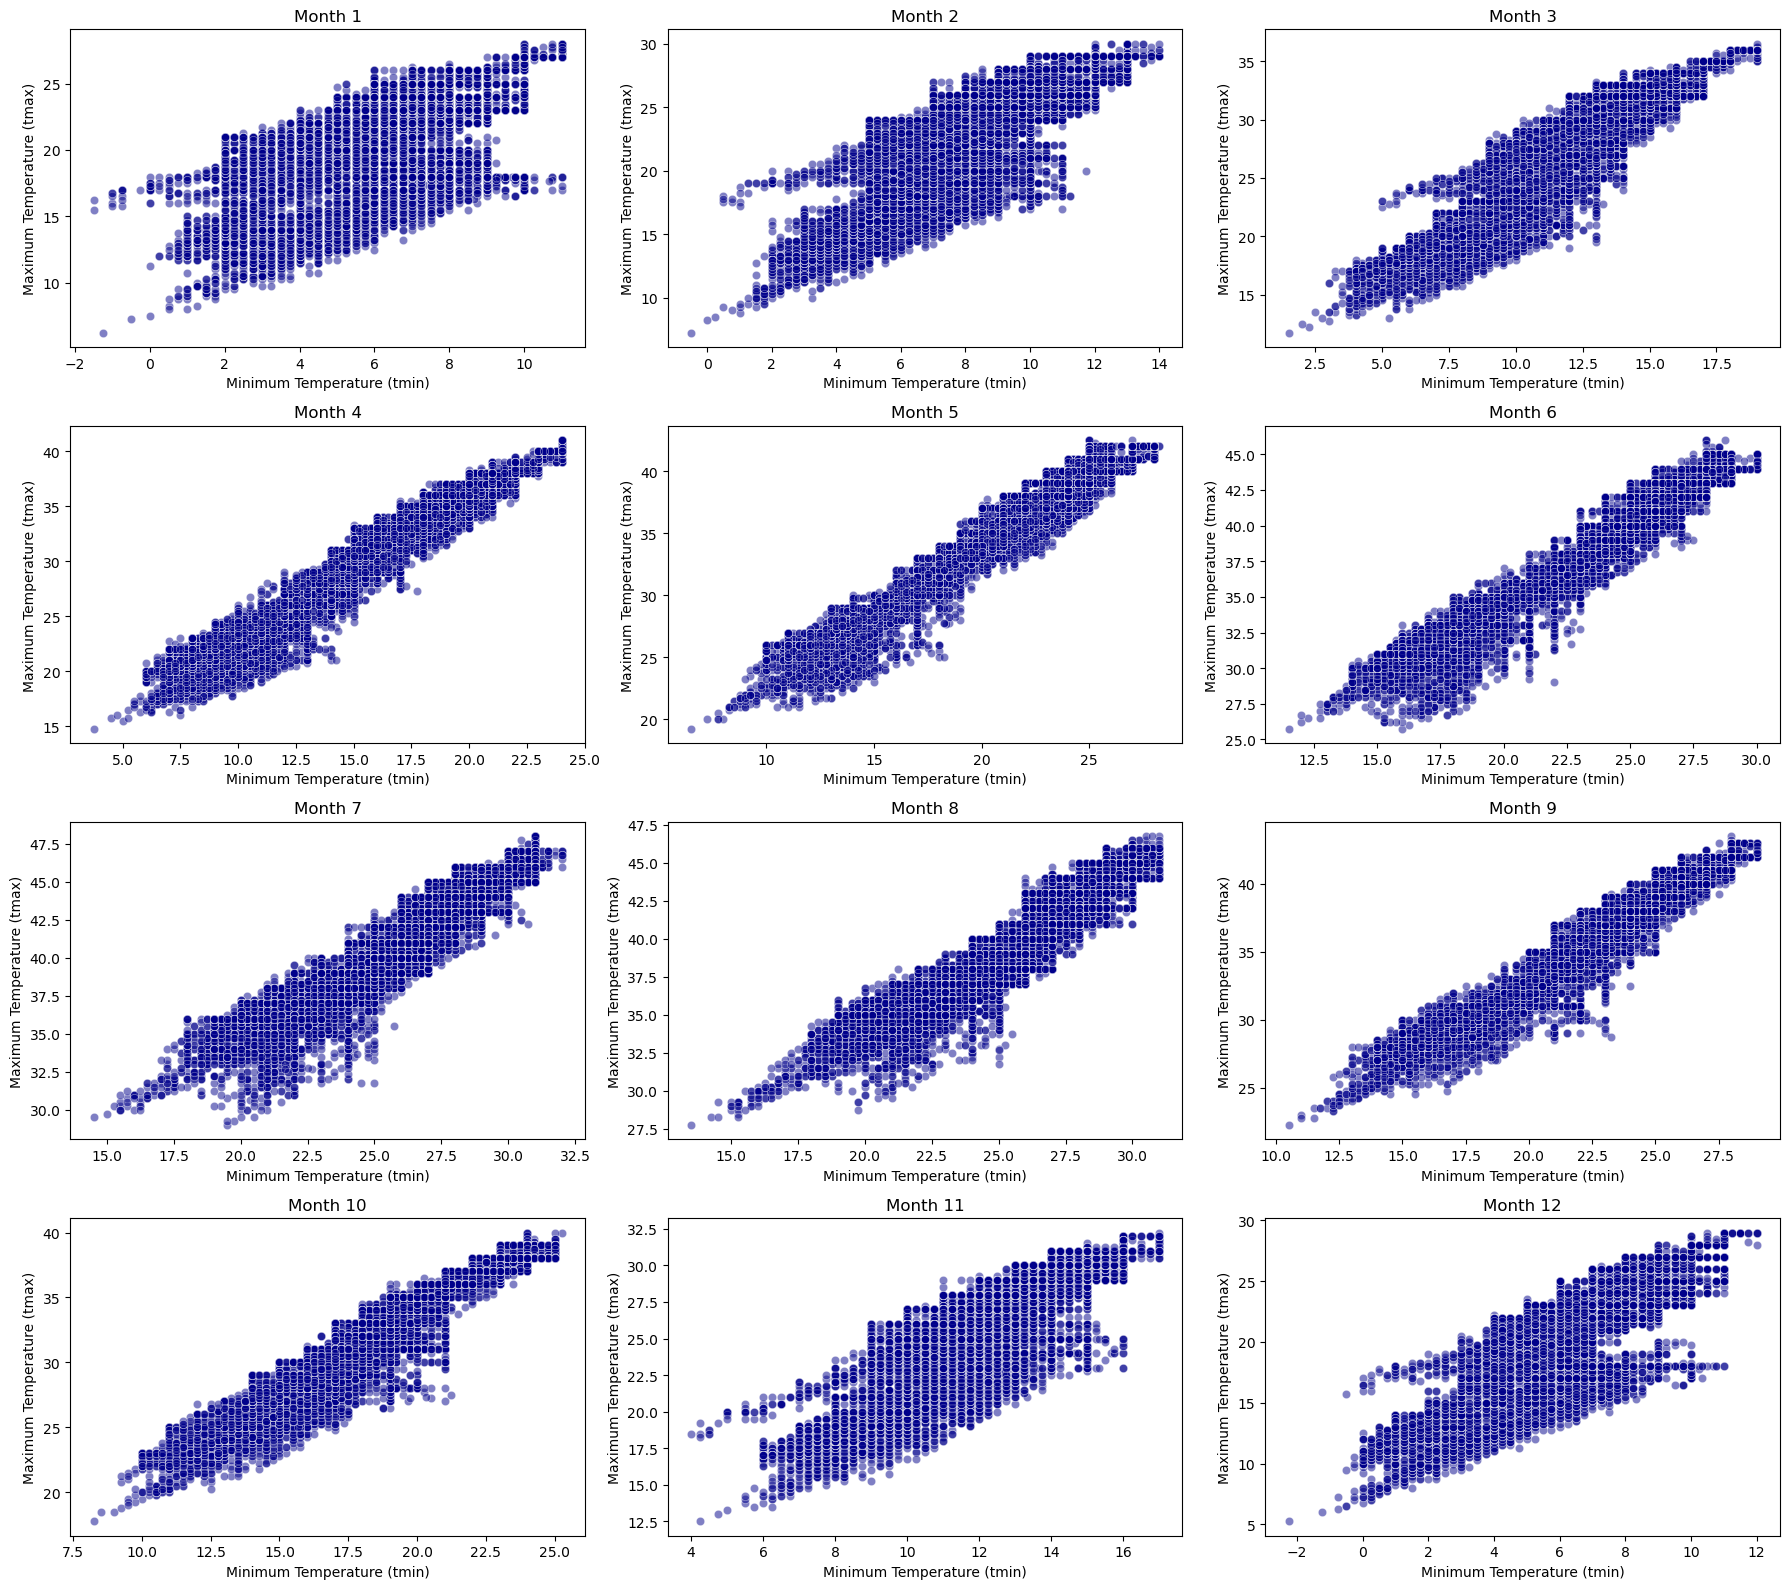

In [54]:
# scatter plot tmin vs tmax for each month with subplots
fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(18, 16))
for i, time in enumerate(unique_times):
    sns.scatterplot(
        x='tmin',
        y='tmax',
        data=climate_df[climate_df['time'] == time],
        ax=axes[i // 3, i % 3],
        color='darkblue',
        alpha=0.5
    )
    axes[i // 3, i % 3].set_title(f'Month {time}')
    axes[i // 3, i % 3].set_xlabel('Minimum Temperature (tmin)')
    axes[i // 3, i % 3].set_ylabel('Maximum Temperature (tmax)')
plt.tight_layout()
plt.savefig(os.path.join(Images_dir, "tmin_vs_tmax_scatter_by_month.png"))
plt.show()

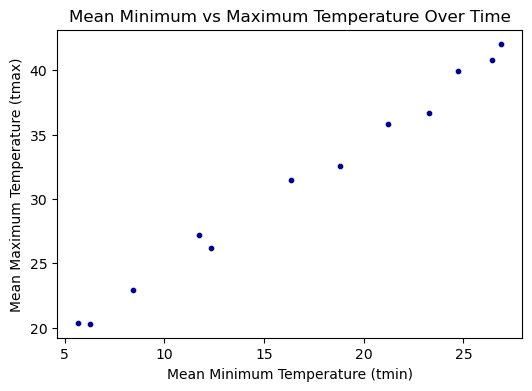

In [57]:
# scatter plot of mean tmin vs mean tmax over time
mean_temps_over_time = climate_df.groupby('time').agg({'tmin': 'mean', 'tmax': 'mean'}).reset_index()
plt.figure(figsize=(6, 4))
sns.scatterplot(
    x='tmin',
    y='tmax',
    data=mean_temps_over_time,
    color='darkblue',
    s=20
)
plt.title('Mean Minimum vs Maximum Temperature Over Time')
plt.xlabel('Mean Minimum Temperature (tmin)')
plt.ylabel('Mean Maximum Temperature (tmax)')
plt.savefig(os.path.join(Images_dir, "mean_tmin_vs_mean_tmax_scatter.png"))
plt.show()

we can observe from scatter plot a positive strong linear correlation

In [58]:
# calculate spearman correlation
spearman_corr = climate_df[['tmin', 'tmax']].corr(method='spearman').iloc[0, 1]
print("Spearman correlation between tmin and tmax:", spearman_corr)

Spearman correlation between tmin and tmax: 0.9788225326780362


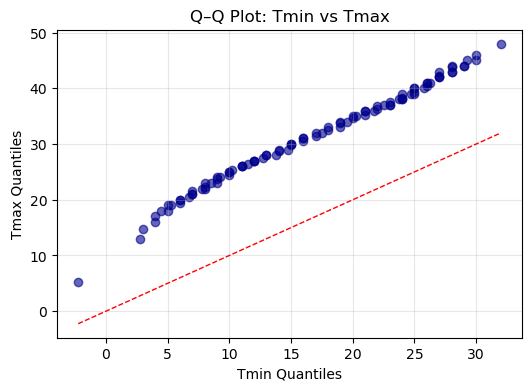

In [73]:
tmin = climate_df['tmin']
tmax = climate_df['tmax']

# Oquantile vs quantile 
quantiles = np.linspace(0, 1, 100)
tmin_q = np.quantile(tmin, quantiles)
tmax_q = np.quantile(tmax, quantiles)
plt.figure(figsize=(6, 4))
plt.scatter(tmin_q, tmax_q, color='darkblue', alpha=0.6)
plt.plot([tmin_q.min(), tmin_q.max()], [tmin_q.min(), tmin_q.max()], 'r--', lw=1)
plt.xlabel('Tmin Quantiles')
plt.ylabel('Tmax Quantiles')
plt.title('Q–Q Plot: Tmin vs Tmax')
plt.grid(alpha=0.3)
plt.savefig(os.path.join(Images_dir, "qqplot_tmin_vs_tmax.png"))
plt.show()


### tmin vs prec

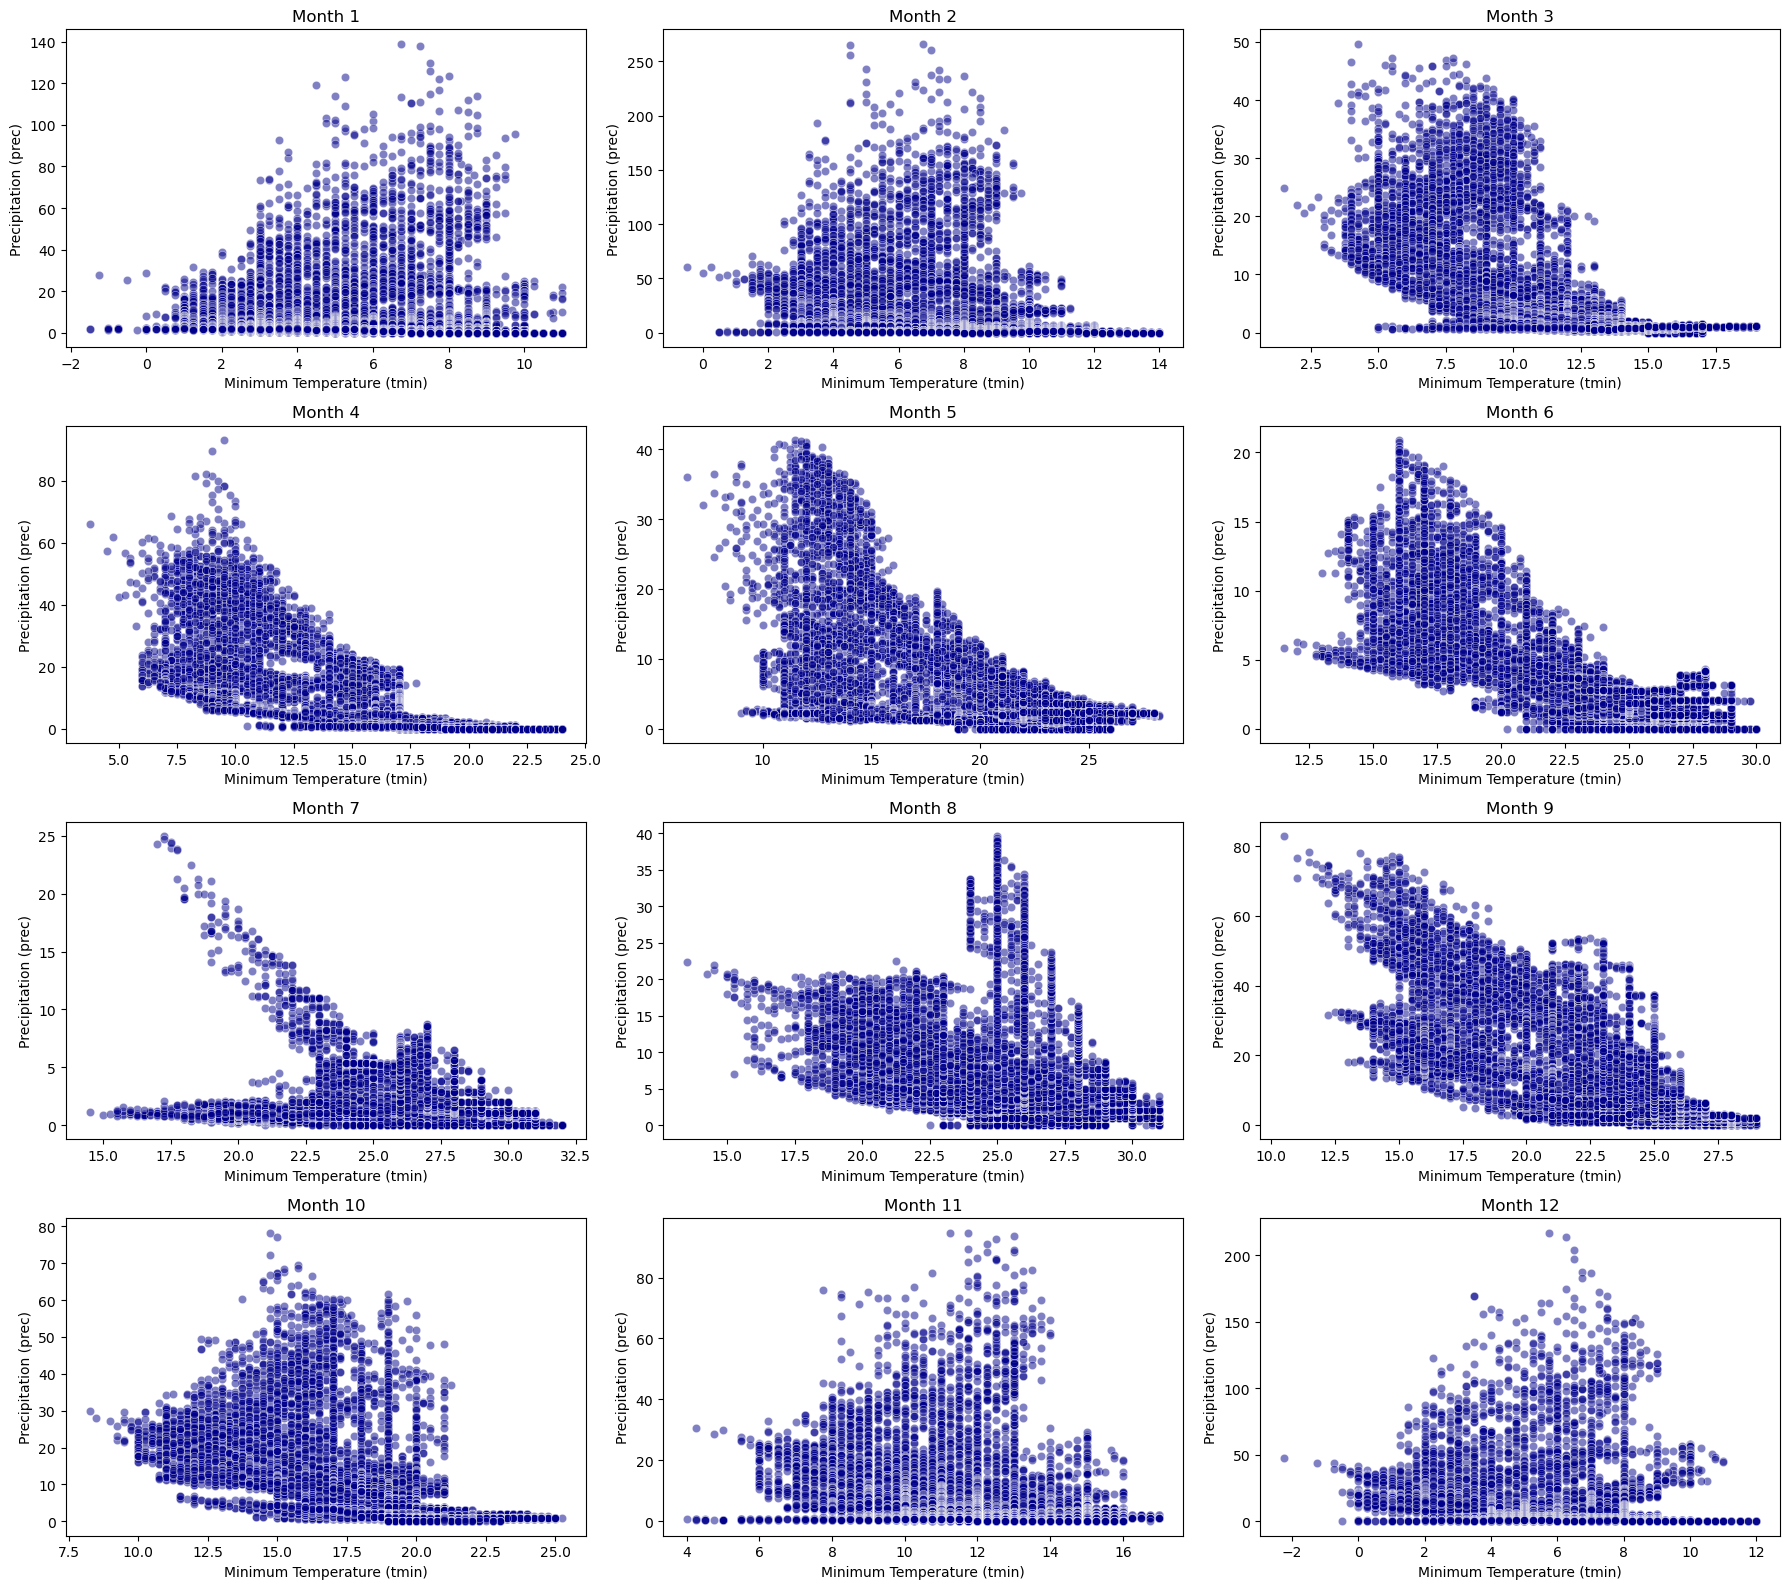

In [70]:
# scatter plot tmin vs prec for each month with subplots
fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(18, 16))
for i, time in enumerate(unique_times):
    sns.scatterplot(
        x='tmin',
        y='prec',
        data=climate_df[climate_df['time'] == time],
        ax=axes[i // 3, i % 3],
        color='darkblue',
        alpha=0.5
    )
    axes[i // 3, i % 3].set_title(f'Month {time}')
    axes[i // 3, i % 3].set_xlabel('Minimum Temperature (tmin)')
    axes[i // 3, i % 3].set_ylabel('Precipitation (prec)')
plt.tight_layout()
plt.savefig(os.path.join(Images_dir, "tmin_vs_prec_scatter_by_month.png"))
plt.show()

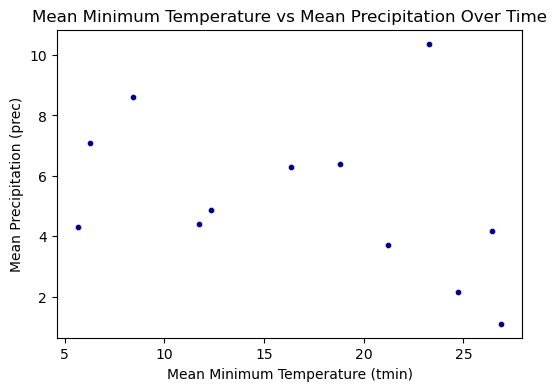

In [71]:
# scatter plot of mean tmin vs mean precipitation over time
mean_temps_over_time = climate_df.groupby('time').agg({'tmin': 'mean', 'prec': 'mean'}).reset_index()
plt.figure(figsize=(6, 4))
sns.scatterplot(
    x='tmin',
    y='prec',
    data=mean_temps_over_time,
    color='darkblue',
    s=20
)
plt.title('Mean Minimum Temperature vs Mean Precipitation Over Time')
plt.xlabel('Mean Minimum Temperature (tmin)')
plt.ylabel('Mean Precipitation (prec)')
plt.savefig(os.path.join(Images_dir, "mean_tmin_vs_mean_prec_scatter.png"))
plt.show()

In [72]:
# spearman correlation
spearman_corr = climate_df[['tmin', 'prec']].corr(method='spearman').iloc[0, 1]
print("Spearman correlation between tmin and prec:", spearman_corr)

Spearman correlation between tmin and prec: -0.26497351558758125


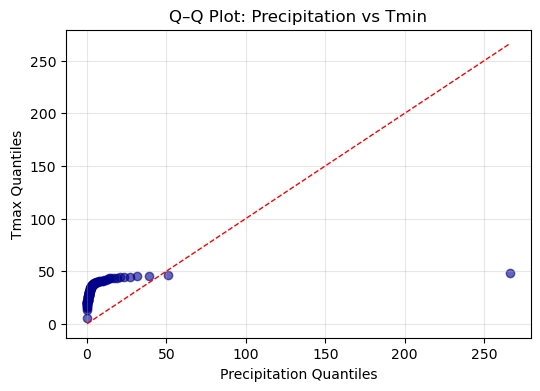

In [79]:
tmin = climate_df['tmin']
prec = climate_df['prec']

quantiles = np.linspace(0, 1, 100)
tmin_q = np.quantile(tmin, quantiles)
prec_q = np.quantile(prec, quantiles)
plt.figure(figsize=(6, 4))
plt.scatter(prec_q, tmax_q, color='darkblue', alpha=0.6)
plt.plot([prec_q.min(), prec_q.max()], [prec_q.min(), prec_q.max()], 'r--', lw=1)
plt.xlabel('Precipitation Quantiles')
plt.ylabel('Tmax Quantiles')
plt.title('Q–Q Plot: Precipitation vs Tmin')
plt.grid(alpha=0.3)
plt.savefig(os.path.join(Images_dir, "qqplot_prec_vs_tmin.png"))
plt.show()


### tmax vs prec

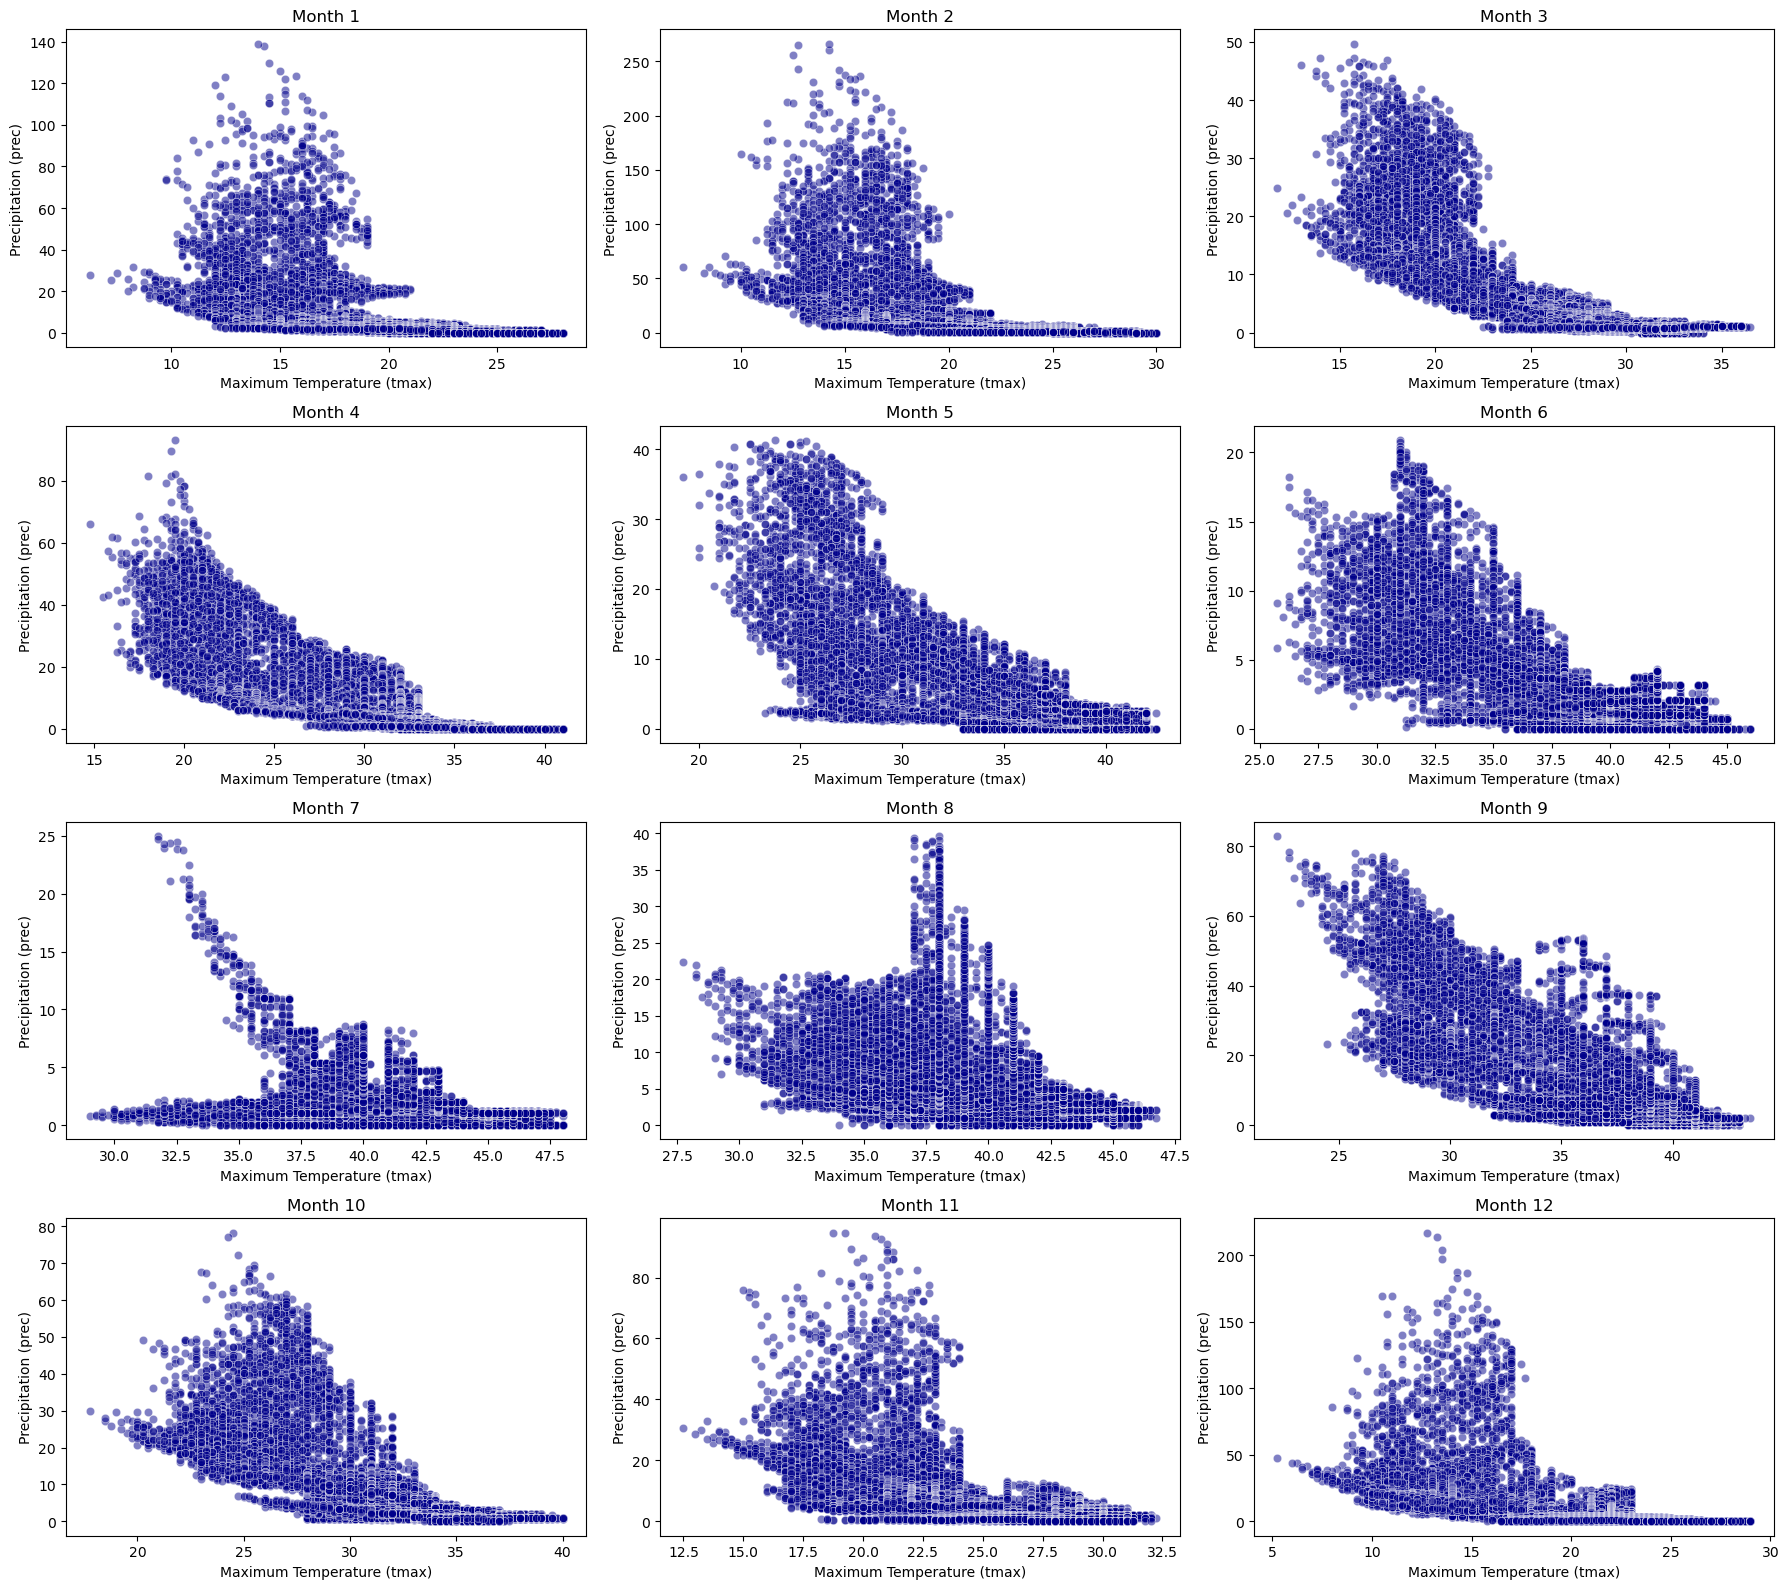

In [75]:
# scatter plot tmax vs prec for each month with subplots
fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(18, 16))
for i, time in enumerate(unique_times):
    sns.scatterplot(
        x='tmax',
        y='prec',
        data=climate_df[climate_df['time'] == time],
        ax=axes[i // 3, i % 3],
        color='darkblue',
        alpha=0.5
    )
    axes[i // 3, i % 3].set_title(f'Month {time}')
    axes[i // 3, i % 3].set_xlabel('Maximum Temperature (tmax)')
    axes[i // 3, i % 3].set_ylabel('Precipitation (prec)')
plt.tight_layout()
plt.savefig(os.path.join(Images_dir, "tmax_vs_prec_scatter_by_month.png"))
plt.show()

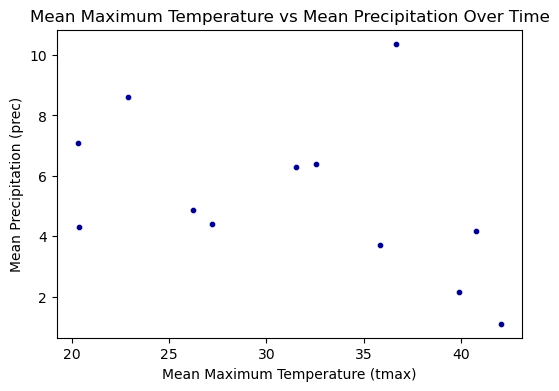

In [76]:
# scatter plot of mean tmax vs mean precipitation over time
mean_temps_over_time = climate_df.groupby('time').agg({'tmax': 'mean', 'prec': 'mean'}).reset_index()
plt.figure(figsize=(6, 4))
sns.scatterplot(
    x='tmax',
    y='prec',
    data=mean_temps_over_time,
    color='darkblue',
    s=20
)
plt.title('Mean Maximum Temperature vs Mean Precipitation Over Time')
plt.xlabel('Mean Maximum Temperature (tmax)')
plt.ylabel('Mean Precipitation (prec)')
plt.savefig(os.path.join(Images_dir, "mean_tmax_vs_mean_prec_scatter.png"))
plt.show()

In [77]:
# spearman correlation
spearman_corr = climate_df[['tmax', 'prec']].corr(method='spearman').iloc[0, 1]
print("Spearman correlation between tmax and prec:", spearman_corr)

Spearman correlation between tmax and prec: -0.3772145106464444


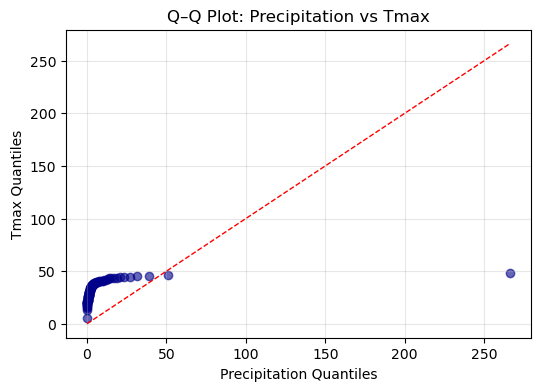

In [78]:
tmax = climate_df['tmax']
prec = climate_df['prec']

quantiles = np.linspace(0, 1, 100)
prec_q = np.quantile(prec, quantiles)
tmax_q = np.quantile(tmax, quantiles)
plt.figure(figsize=(6, 4))
plt.scatter(prec_q, tmax_q, color='darkblue', alpha=0.6)
plt.plot([prec_q.min(), prec_q.max()], [prec_q.min(), prec_q.max()], 'r--', lw=1)
plt.xlabel('Precipitation Quantiles')
plt.ylabel('Tmax Quantiles')
plt.title('Q–Q Plot: Precipitation vs Tmax')
plt.grid(alpha=0.3)
plt.savefig(os.path.join(Images_dir, "qqplot_prec_vs_tmax.png"))
plt.show()


## Multivariate Analysis

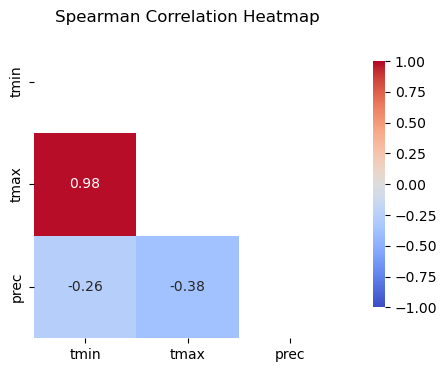

In [81]:
# correlation heatmap between tmin, tmax, prec ( bottom half)
corr_matrix = climate_df[['tmin', 'tmax', 'prec']].corr(method='spearman')
plt.figure(figsize=(8, 4))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, square=True, cbar_kws={"shrink": .8}, mask=np.triu(np.ones_like(corr_matrix, dtype=bool)))
plt.title('Spearman Correlation Heatmap')
plt.savefig(os.path.join(Images_dir, "correlation_heatmap.png"))
plt.show()

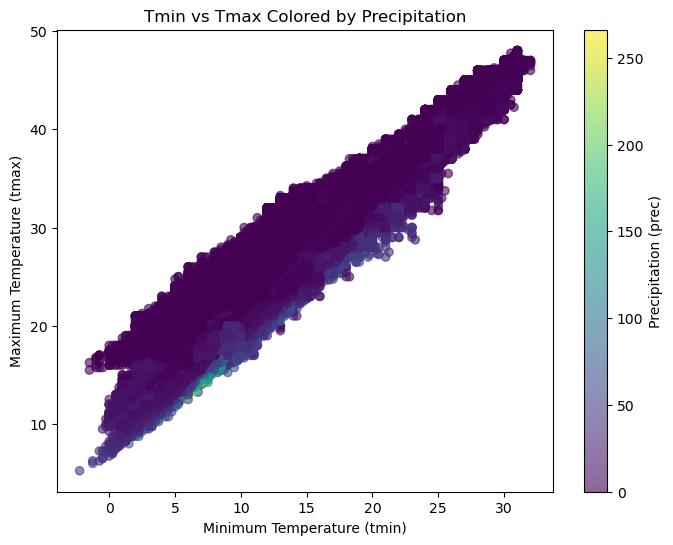

In [82]:
# scatter plot tmin vs tmax colored by prec
plt.figure(figsize=(8, 6))
scatter = plt.scatter(
    climate_df['tmin'],
    climate_df['tmax'],
    c=climate_df['prec'],
    cmap='viridis',
    alpha=0.6
)
plt.colorbar(scatter, label='Precipitation (prec)')
plt.title('Tmin vs Tmax Colored by Precipitation')
plt.xlabel('Minimum Temperature (tmin)')
plt.ylabel('Maximum Temperature (tmax)')
plt.savefig(os.path.join(Images_dir, "tmin_vs_tmax_colored_by_prec.png"))
plt.show()

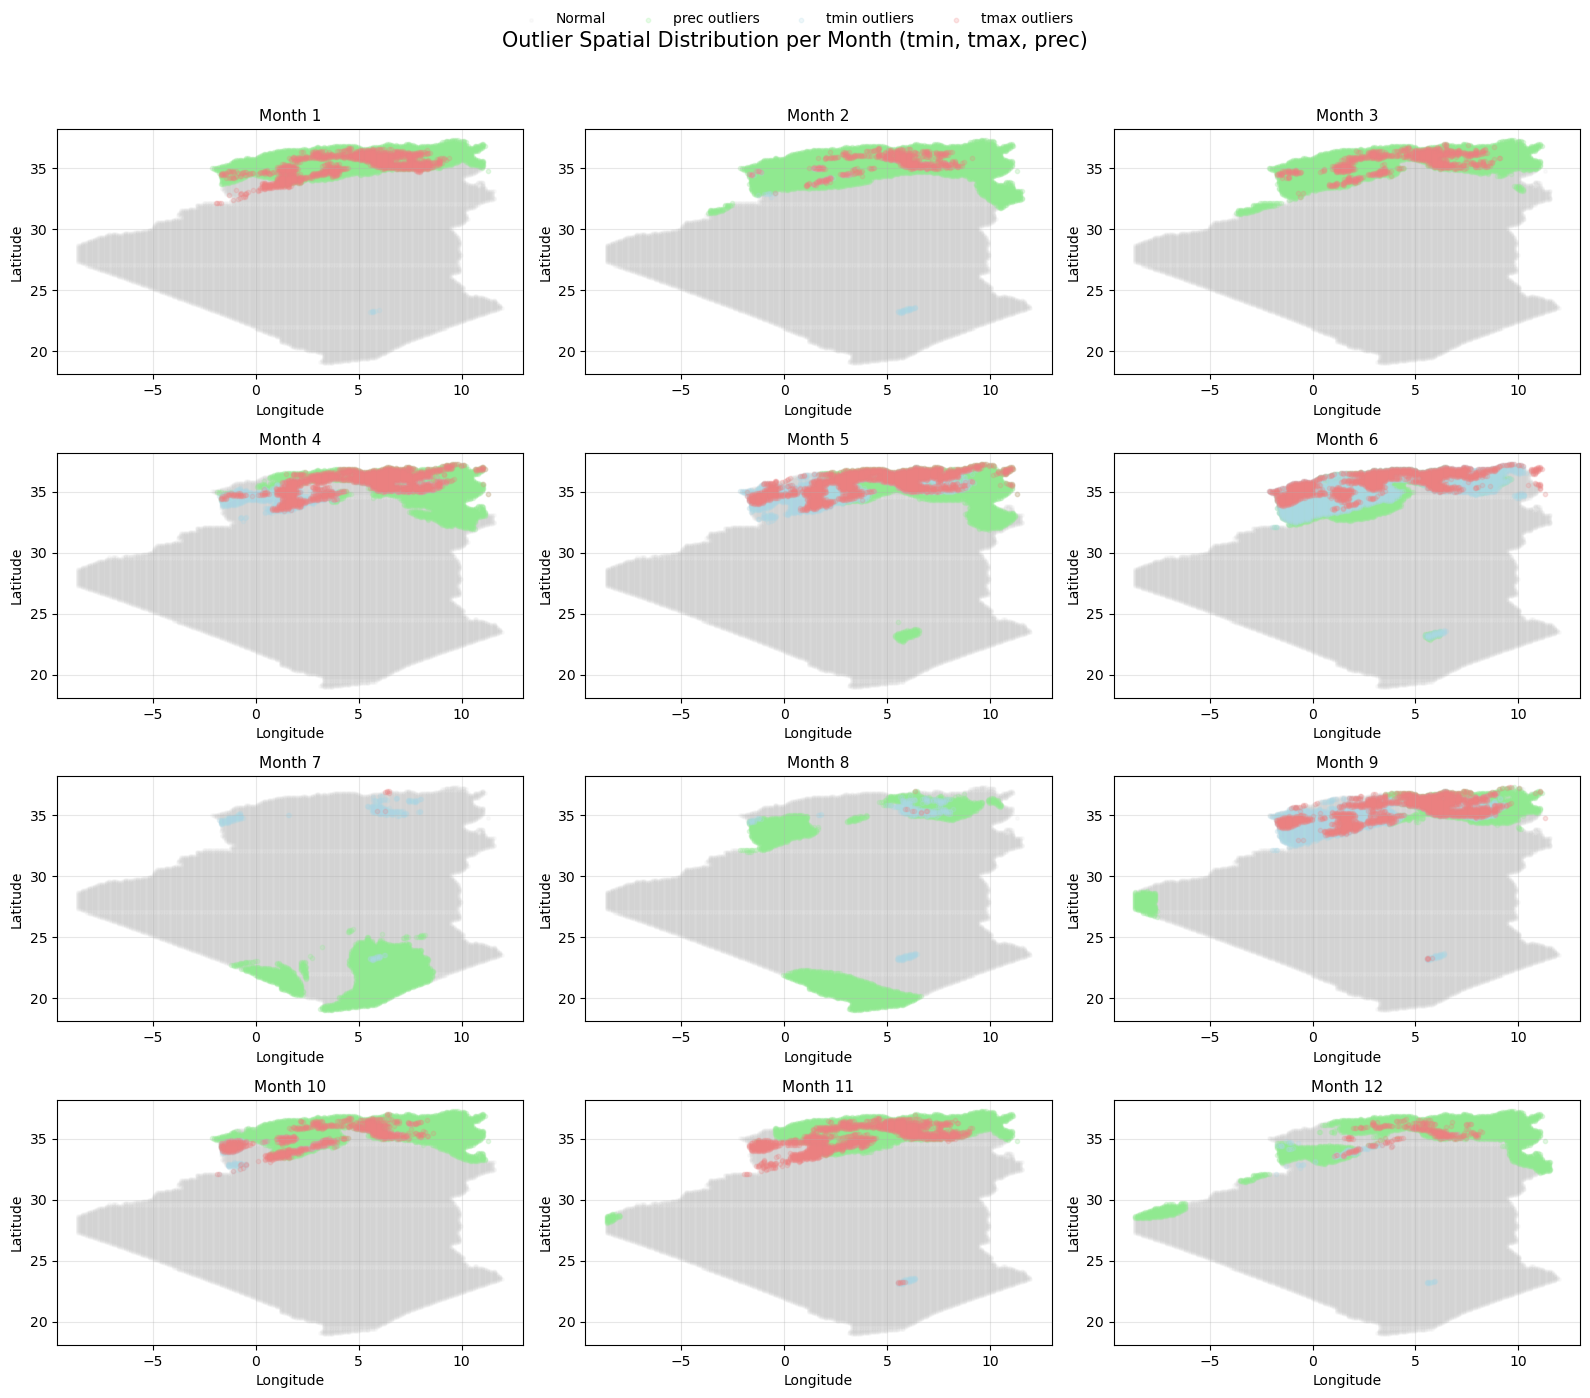

In [89]:
# --- Setup figure ---
fig, axes = plt.subplots(4, 3, figsize=(16, 14))
axes = axes.flatten()

for i, time in enumerate(unique_times):
    month_data = climate_df[climate_df['time'] == time]

    # --- Compute IQR bounds ---
    def iqr_bounds(series):
        Q1 = series.quantile(0.25)
        Q3 = series.quantile(0.75)
        IQR = Q3 - Q1
        return Q1 - 1.5 * IQR, Q3 + 1.5 * IQR

    lb_tmin, ub_tmin = iqr_bounds(month_data['tmin'])
    lb_tmax, ub_tmax = iqr_bounds(month_data['tmax'])
    lb_prec, ub_prec = iqr_bounds(month_data['prec'])

    # --- Identify outliers ---
    outliers_tmin = month_data[(month_data['tmin'] < lb_tmin) | (month_data['tmin'] > ub_tmin)]
    outliers_tmax = month_data[(month_data['tmax'] < lb_tmax) | (month_data['tmax'] > ub_tmax)]
    outliers_prec = month_data[(month_data['prec'] < lb_prec) | (month_data['prec'] > ub_prec)]

    # --- Plot month map ---
    ax = axes[i]
    ax.scatter(month_data['lon'], month_data['lat'], c='lightgrey', s=6, alpha=0.1, label='Normal')
    ax.scatter(outliers_prec['lon'], outliers_prec['lat'], color='lightgreen', s=10, alpha=0.2, label='prec outliers')
    ax.scatter(outliers_tmin['lon'], outliers_tmin['lat'], color='lightblue', s=10, alpha=0.2, label='tmin outliers')
    ax.scatter(outliers_tmax['lon'], outliers_tmax['lat'], color='lightcoral', s=10, alpha=0.2, label='tmax outliers')
    
    

    ax.set_title(f'Month {time}', fontsize=11)
    ax.set_xlabel('Longitude')
    ax.set_ylabel('Latitude')
    ax.grid(alpha=0.3)

# --- Global legend (only once) ---
handles, labels = axes[0].get_legend_handles_labels()
fig.legend(handles, labels, loc='upper center', ncol=4, frameon=False)

plt.suptitle("Outlier Spatial Distribution per Month (tmin, tmax, prec)", fontsize=15)
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.savefig(os.path.join(Images_dir, "climate_outlier_spatial_maps.png"))
plt.show()


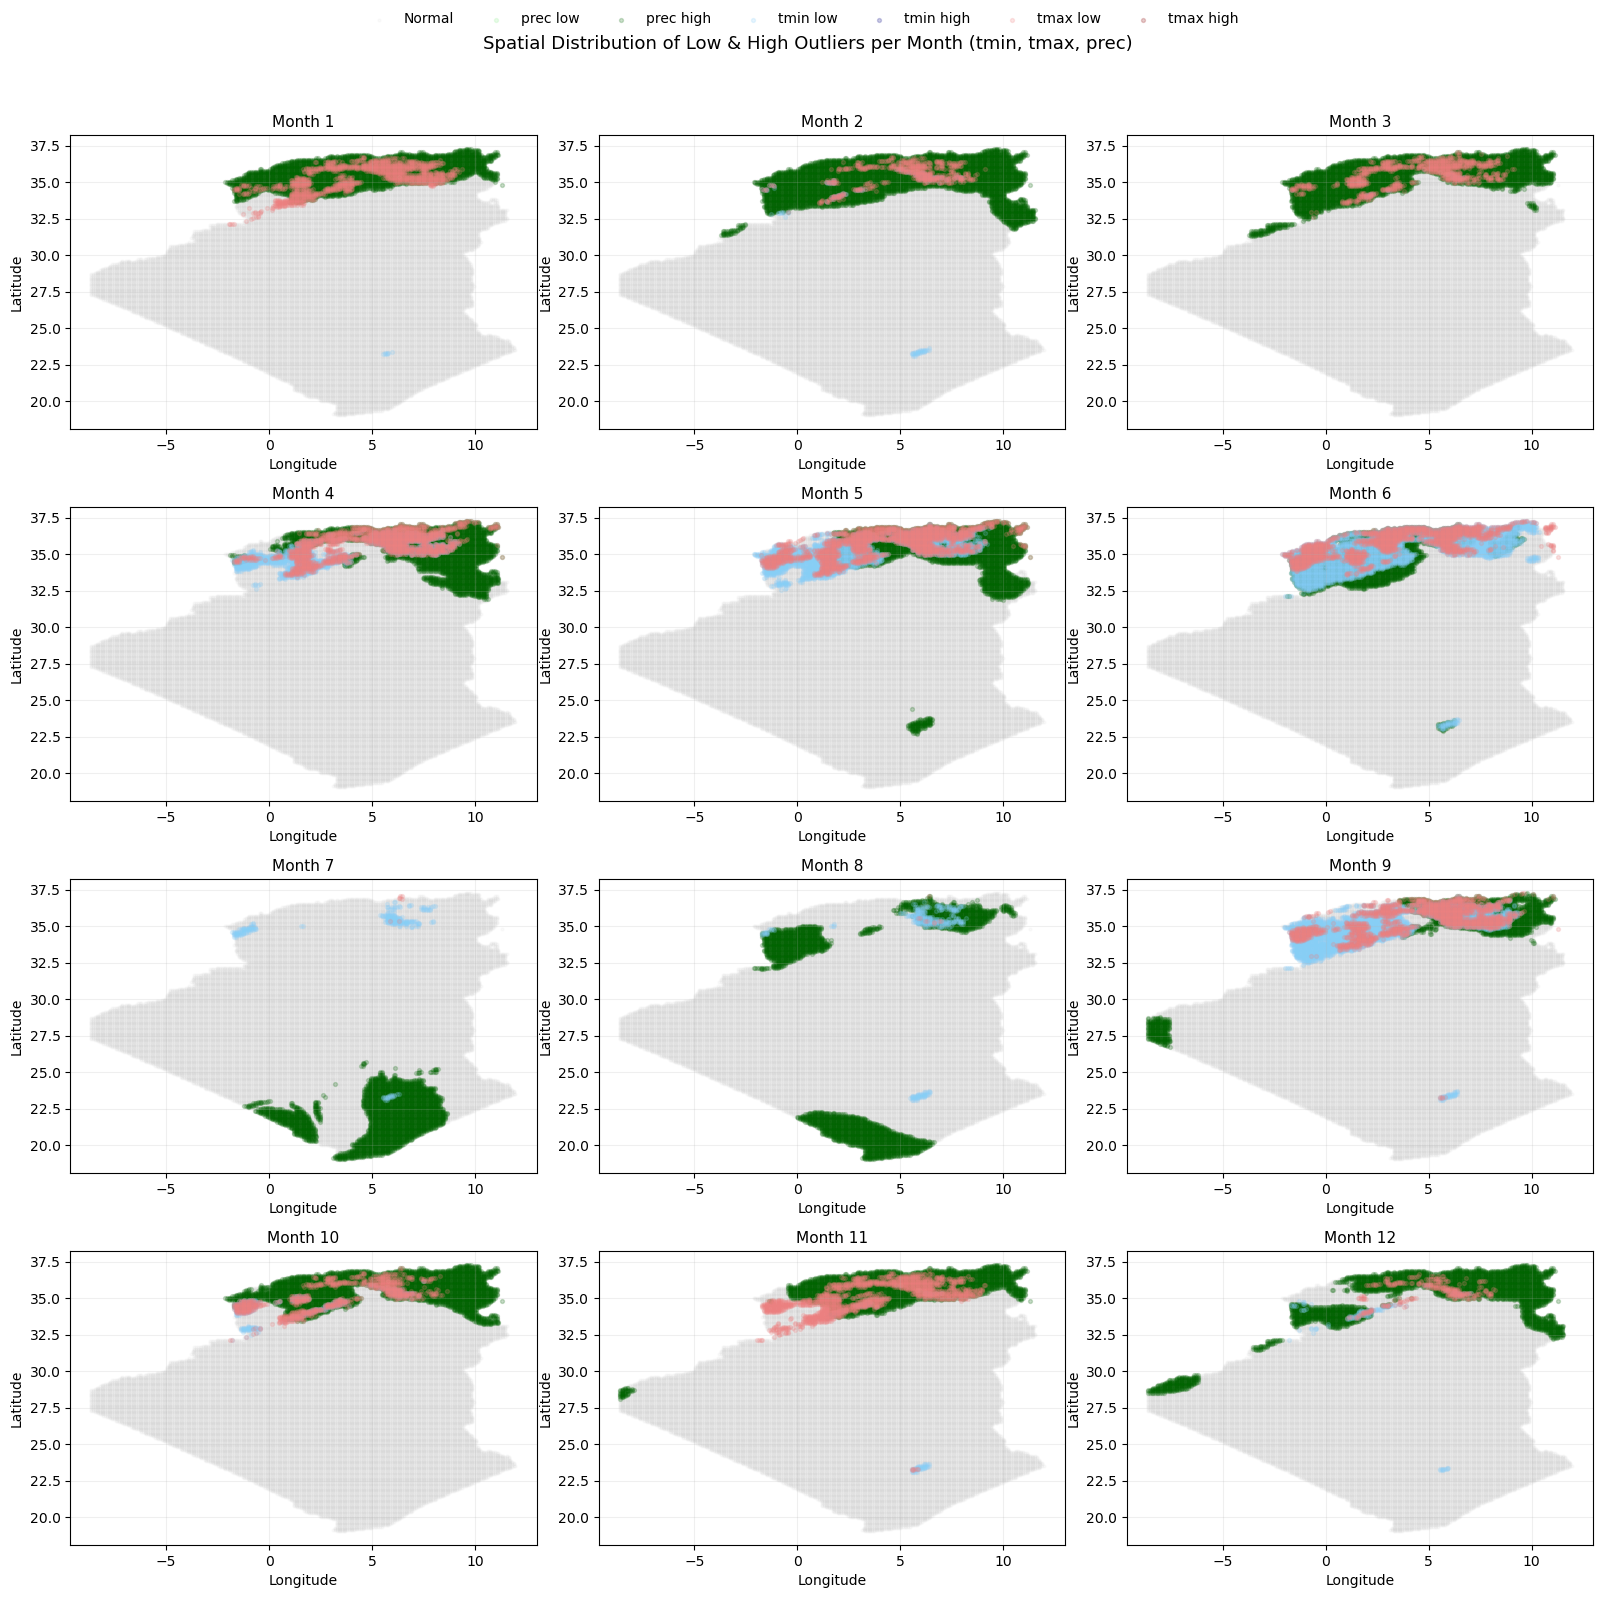

In [ ]:
fig, axes = plt.subplots(4, 3, figsize=(16, 16))
axes = axes.flatten()

for i, time in enumerate(unique_times):
    month_data = climate_df[climate_df['time'] == time]

    # --- IQR bounds helper ---
    def iqr_bounds(series):
        Q1 = series.quantile(0.25)
        Q3 = series.quantile(0.75)
        IQR = Q3 - Q1
        return Q1 - 1.5 * IQR, Q3 + 1.5 * IQR

    lb_tmin, ub_tmin = iqr_bounds(month_data['tmin'])
    lb_tmax, ub_tmax = iqr_bounds(month_data['tmax'])
    lb_prec, ub_prec = iqr_bounds(month_data['prec'])

    # --- Outlier subsets (low/high) ---
    low_tmin = month_data[month_data['tmin'] < lb_tmin]
    high_tmin = month_data[month_data['tmin'] > ub_tmin]
    low_tmax = month_data[month_data['tmax'] < lb_tmax]
    high_tmax = month_data[month_data['tmax'] > ub_tmax]
    low_prec = month_data[month_data['prec'] < lb_prec]
    high_prec = month_data[month_data['prec'] > ub_prec]

    # --- Plot ---
    ax = axes[i]
    ax.scatter(month_data['lon'], month_data['lat'], c='lightgrey', s=4, alpha=0.1, label='Normal')

    # Precipitation (green shades)
    ax.scatter(low_prec['lon'], low_prec['lat'], color='lightgreen', s=8, alpha=0.2, label='prec low')
    ax.scatter(high_prec['lon'], high_prec['lat'], color='darkgreen', s=8, alpha=0.2, label='prec high')

    # Tmin (blue shades)
    ax.scatter(low_tmin['lon'], low_tmin['lat'], color='lightskyblue', s=8, alpha=0.2, label='tmin low')
    ax.scatter(high_tmin['lon'], high_tmin['lat'], color='navy', s=8, alpha=0.2, label='tmin high')

    # Tmax (red shades)
    ax.scatter(low_tmax['lon'], low_tmax['lat'], color='lightcoral', s=8, alpha=0.2, label='tmax low')
    ax.scatter(high_tmax['lon'], high_tmax['lat'], color='darkred', s=8, alpha=0.2, label='tmax high')



    ax.set_title(f'Month {time}', fontsize=11)
    ax.set_xlabel('Longitude')
    ax.set_ylabel('Latitude')
    ax.grid(alpha=0.2)

# --- Global legend (deduplicated) ---
handles, labels = axes[0].get_legend_handles_labels()
unique = dict(zip(labels, handles))
fig.subplots_adjust(top=0.85)
fig.legend(unique.values(), unique.keys(), loc='upper center', ncol=7, frameon=False)
# add space below legend for the title
fig.subplots_adjust(bottom=0.3)
plt.suptitle("Spatial Distribution of Low & High Outliers per Month (tmin, tmax, prec)", fontsize=13)
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.savefig(os.path.join(Images_dir, "climate_outlier_spatial_maps_low_high.png"))
plt.show()

